# Data Mining - Handin 1 - Clustering 
Welcome to the handin on clustering algorithms and outlier detection. 
This handin corresponds to the topics in Week 5--9 in the course.

The handin is 
* done in the chosen handin groups
* worth 10% of the final grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of the number of points is 100. For the maximum grade you need to get at least _90 points_. The minimum grade (02 in the Danish scale)
requires **at least** 30 points, with at least 8 points from the first three Parts (Part 1,2,3) and 6 points in the last part (Part 4).

**The exercise types**: There are four different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-5 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
4. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). **However**, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient!

**Q&A**

Q: If the task is to implement a mean function, may I just call ```np.mean()```? 
<br>A: No.

Q: If the task is to compare the mean of X and Y, may I use ```np.mean()``` to calculate the mean?
<br>A: Yes.

Q: If I have implemented a mean function in a previous task, but I am unsure of its correctness, may I use ```np.mean()``` in following task where mean is used as a helper function? 
<br>A: Yes.

Q: May I use ```np.mean()``` to debug my implementation of mean?
<br>A: Yes.

Q: Do I get 0 points for a task if I skip it?
<br>A: Yes.

Q: Can I get partial points for a task I did partially correct?
<br>A: Yes.

Q: Is it OK to skip a task if I do not need the points from it?
<br>A: Yes.

Q: Should I inform a TA if I find an error?
<br>A: Yes.

Q: Should I ask questions if I am confused?
<br>A: Yes.



Good luck!

In [1]:
## DO NOT TOUCH
import numpy as np
import pandas as pd
import warnings
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sns


RANDOM_SEED = 132414
## DO NOT TOUCH
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
color_map = {0:'Blue', 1:'Red', 2:'Green'}
toy = df.sample(n=15, random_state=RANDOM_SEED)
toy

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
117    12.42        1.61  2.19               22.5      108.0           2.00   
6      14.39        1.87  2.45               14.6       96.0           2.50   
18     14.19        1.59  2.48               16.5      108.0           3.30   
91     12.00        1.51  2.42               22.0       86.0           1.45   
110    11.46        3.74  1.82               19.5      107.0           3.18   
129    12.04        4.30  2.38               22.0       80.0           2.10   
39     14.22        3.99  2.51               13.2      128.0           3.00   
114    12.08        1.39  2.50               22.5       84.0           2.56   
1      13.20        1.78  2.14               11.2      100.0           2.65   
116    11.82        1.47  1.99               20.8       86.0           1.98   
29     14.02        1.68  2.21               16.0       96.0           2.65   
119    12.00        3.43  2.00               19.0       87.0           2.00   
125    12.07        2.16  2.17               21.0       85.0           2.60   
154    12.58        1.29  2.10               20.0      103.0           1.48   
118    12.77        3.43  1.98               16.0       80.0           1.63   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
117        2.09                  0.34             1.61             2.06  1.06   
6          2.52                  0.30             1.98             5.25  1.02   
18         3.93                  0.32             1.86             8.70  1.23   
91         1.25                  0.50             1.63             3.60  1.05   
110        2.58                  0.24             3.58             2.90  0.75   
129        1.75                  0.42             1.35             2.60  0.79   
39         3.04                  0.20             2.08             5.10  0.89   
114        2.29                  0.43             1.04             2.90  0.93   
1          2.76                  0.26             1.28             4.38  1.05   
116        1.60                  0.30             1.53             1.95  0.95   
29         2.33                  0.26             1.98             4.70  1.04   
119        1.64                  0.37             1.87             1.28  0.93   
125        2.65                  0.37             1.35             2.76  0.86   
154        0.58                  0.53             1.40             7.60  0.58   
118        1.25                  0.43             0.83             3.40  0.70   

     od280/od315_of_diluted_wines  proline  target  
117                          2.96    345.0       1  
6                            3.58   1290.0       0  
18                           2.82   1680.0       0  
91                           2.65    450.0       1  
110                          2.81    562.0       1  
129                          2.57    580.0       1  
39                           3.53    760.0       0  
114                          3.19    385.0       1  
1                            3.40   1050.0       0  
116                          3.33    495.0       1  
29                           3.59   1035.0       0  
119                          3.05    564.0       1  
125                          3.28    378.0       1  
154                          1.55    640.0       2  
118                          2.12    372.0       1

# Part 1 Intro Excercises

## Task 1.1 K-Means and DBScan

### Task 1.1.1 (4 points)
<span style='color: green'>**\[Compute by hand\]**</span> the cluster assignments _for the dataset below_ using k-means and $k = 2$, with initial centroids being (2.2, 0.9) and (2.3,  1.0)

<font color='red'>To evaluate (i.e., only to control the correctness and not to solve the exercise) your results you can use **sklearn.cluster.KMeans**.</font>


      ash   hue
117  2.19  1.06
6    2.45  1.02
18   2.48  1.23
91   2.42  1.05
110  1.82  0.75
129  2.38  0.79
39   2.51  0.89
114  2.50  0.93
1    2.14  1.05
116  1.99  0.95
29   2.21  1.04
119  2.00  0.93
125  2.17  0.86
154  2.10  0.58
118  1.98  0.70


(1.7855, 2.5444999999999998, 0.5475, 1.2625)

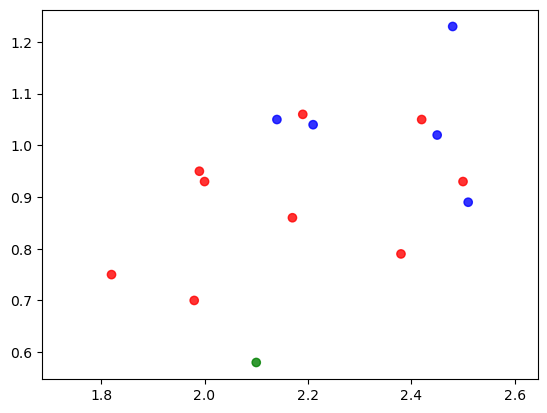

In [2]:
first = 'ash'
last = 'hue'

X_kmeans = toy[[first, last]]
print(X_kmeans)

plt.scatter(X_kmeans[first], X_kmeans[last], alpha=0.8, c=toy['target'].map(color_map))
plt.axis('equal')

*******************
**YOUR ANSWER HERE**
******************

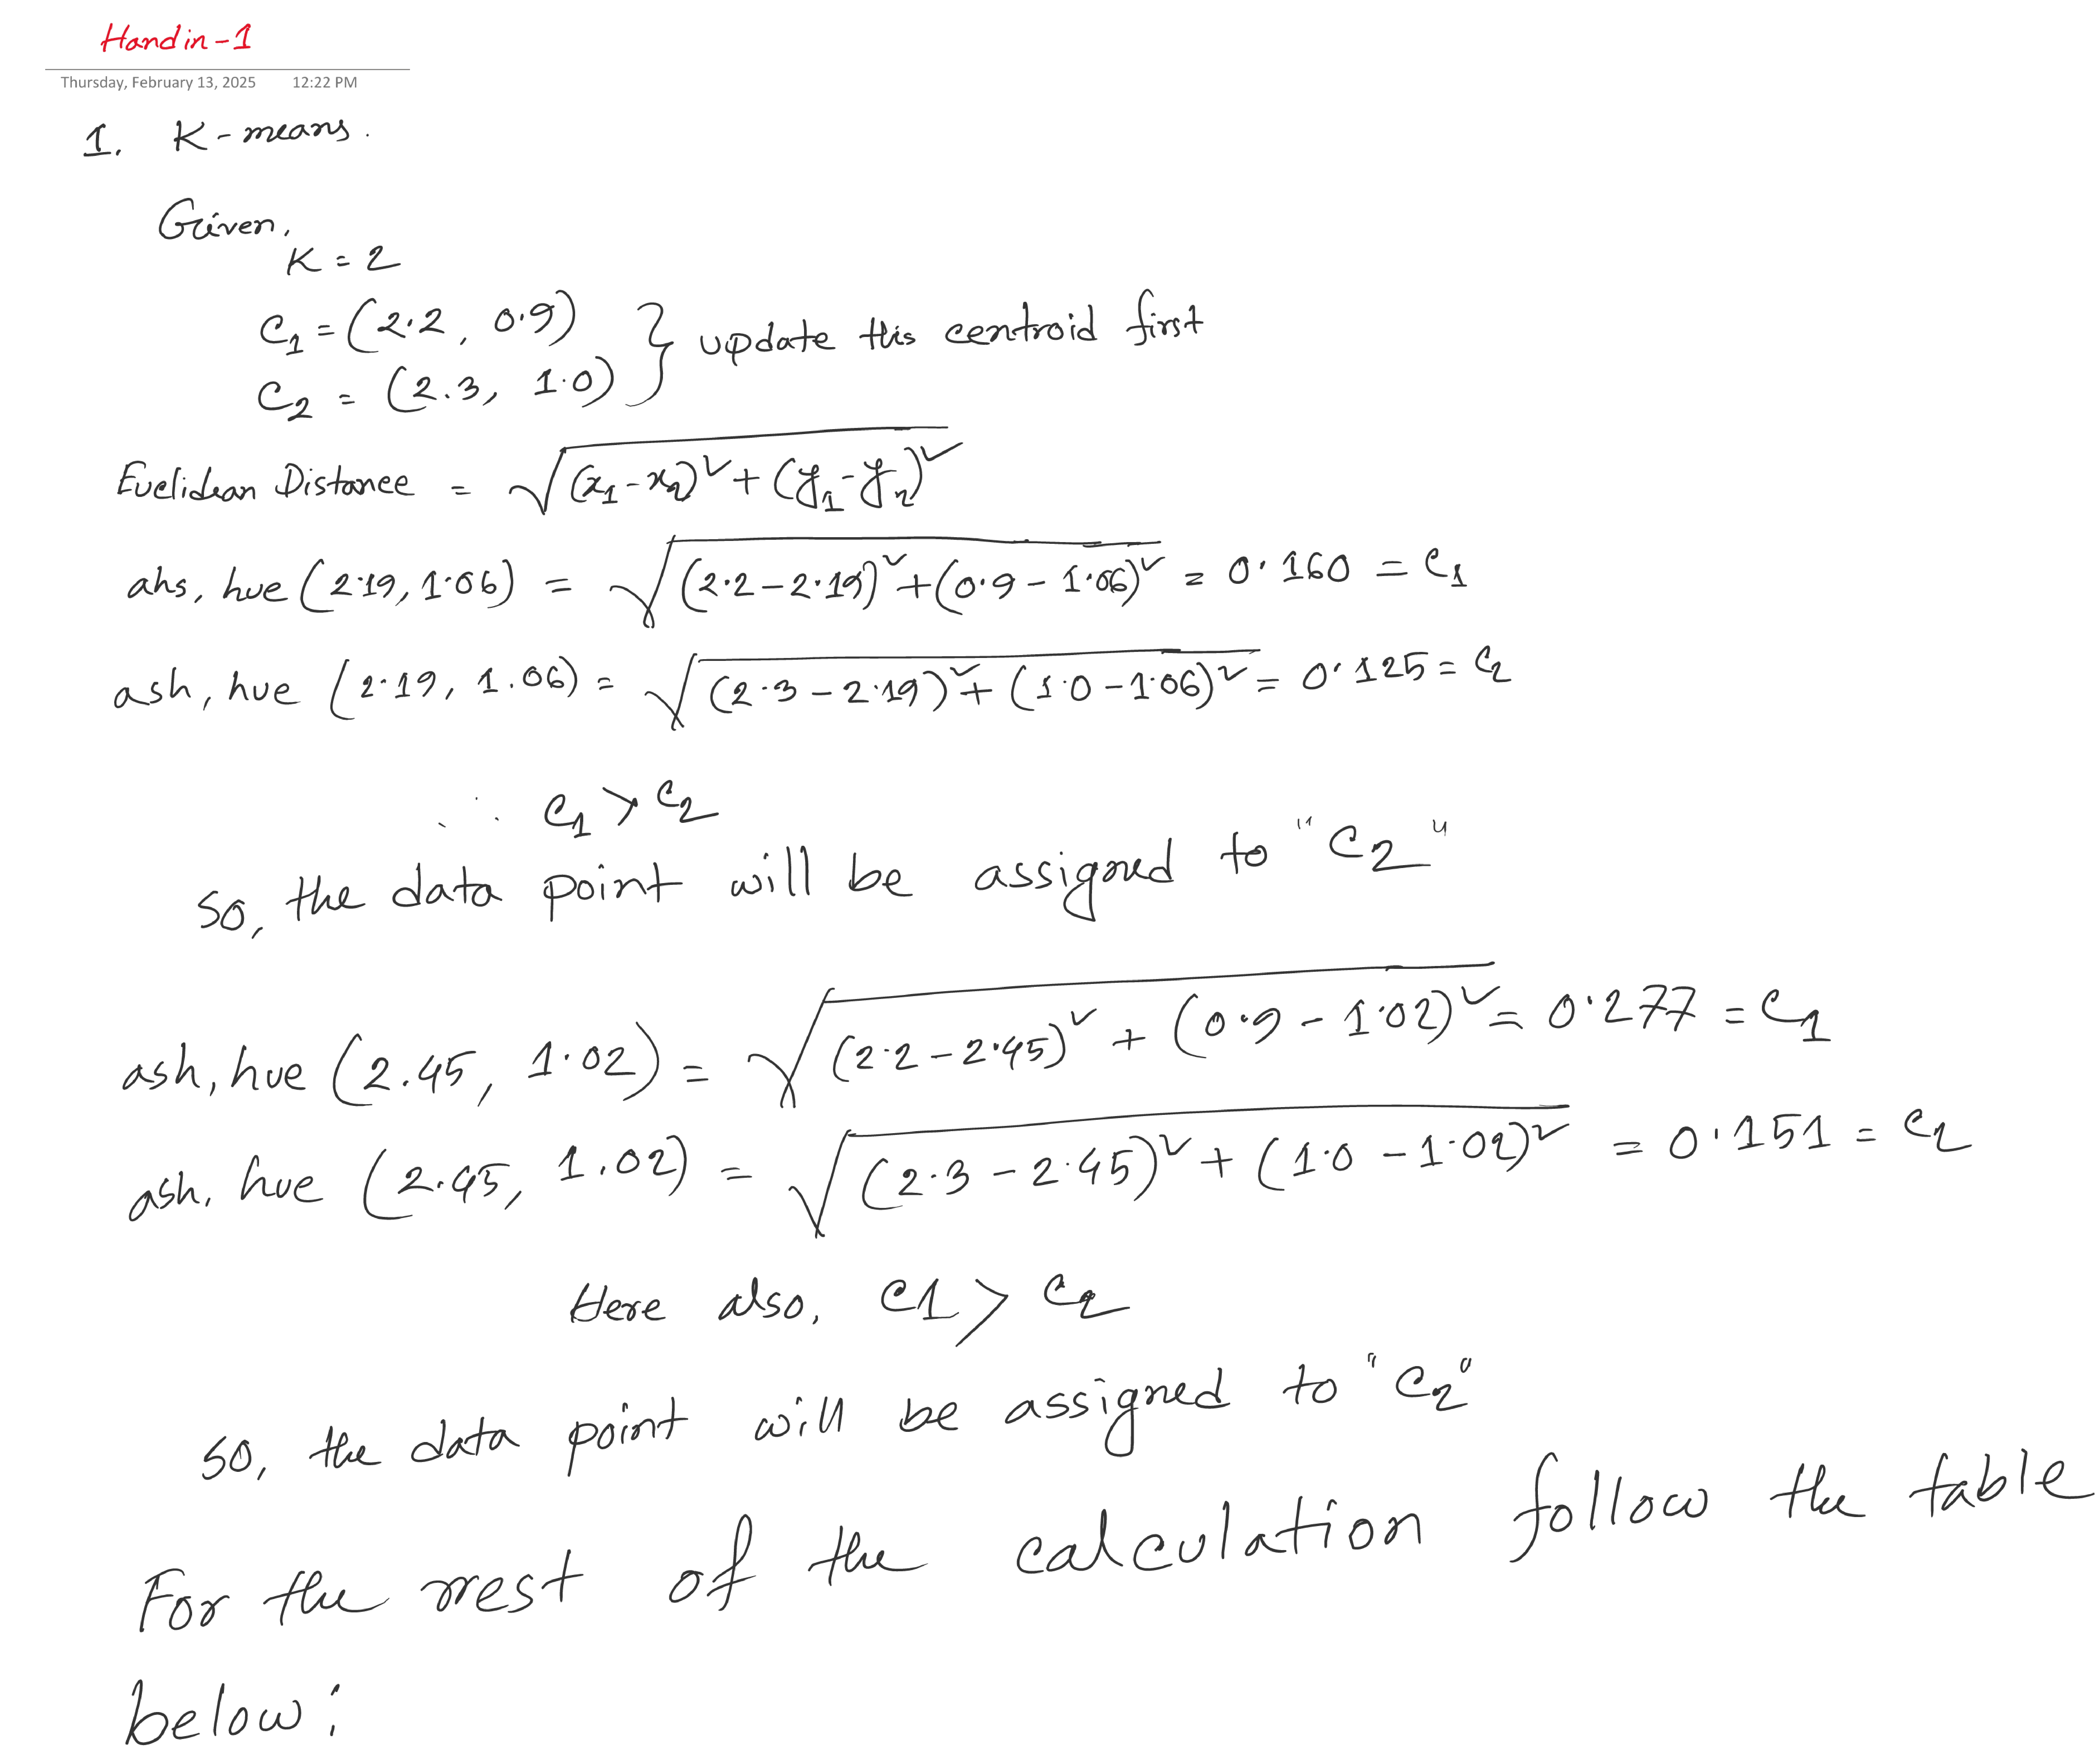

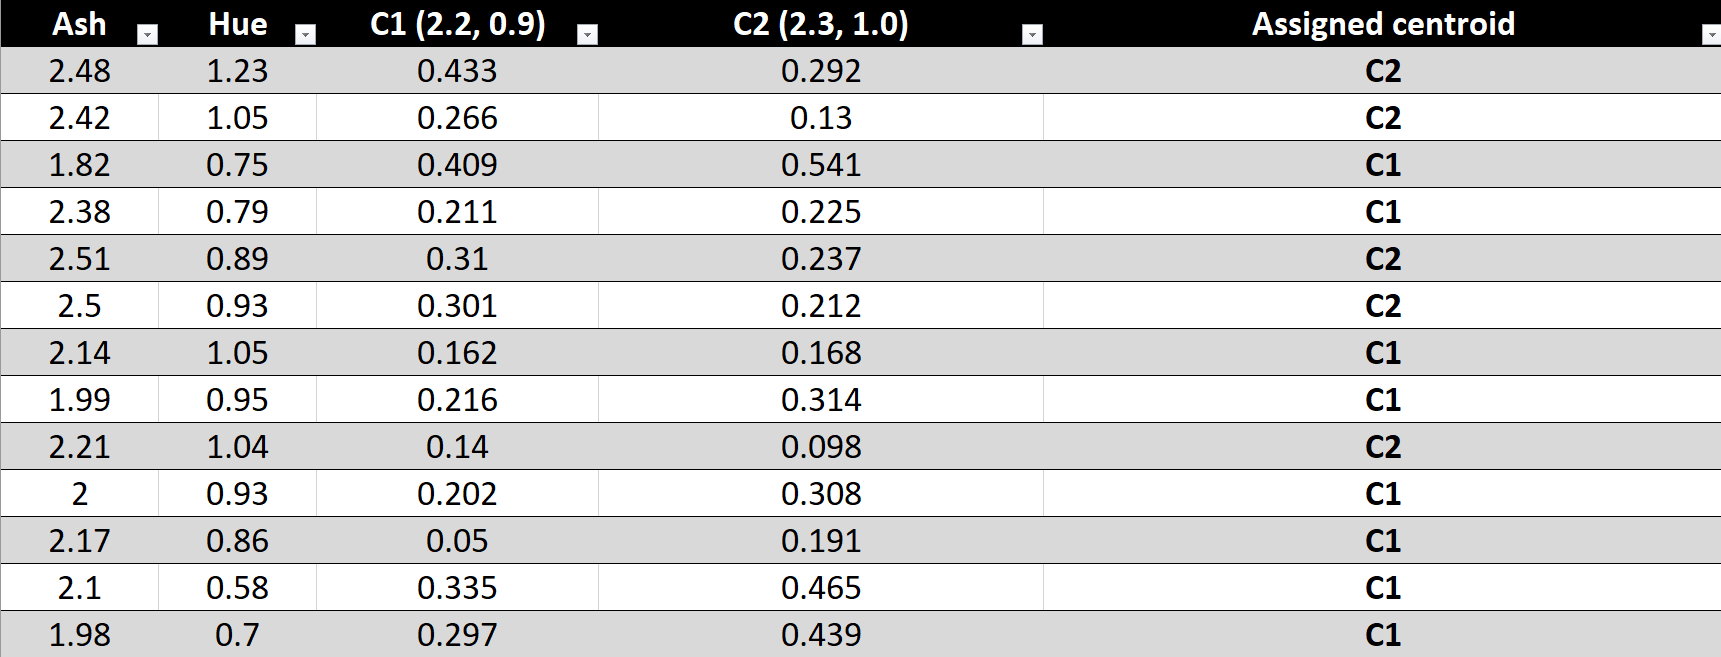

So, the clusters are -> `Cluster 1` = $[(1.82, 0.75), (2.38, 0.79), (2.14, 1.05), (1.99, 0.95), (2, 0.93), (2.17, 0.86), (2.1, 0.58), (1.98, 0.7)]$


`Cluster 2` = $[(2.19, 1.06), (2.45, 1.02), (2.48, 1.23), (2.42, 1.05), (2.51, 0.89), (2.5, 0.93), (2.21, 1.04)]$


count of `Cluster 1` = 8

count of `Cluster 2` = 7 

**For updating the centroid -->**

for `C1` = $(1.82 + 2.38 + 2.14 + 1.99 + 2 + 2.17 + 2.1 + 1.98) / 8, (0.75 + 0.79 + 1.05 + 0.95 + 0.93 + 0.86 + 0.58 + 0.7) /8 $

New `C1` = $(2.07, 0.83)$

for `C2` = $(2.19 + 2.45 + 2.48 + 2.42 + 2.51 + 2.5 + 2.21) / 7, (1.06 + 1.02 + 1.23 + 1.05 + 0.89 + 0.93 + 1.04) / 7 $

New `C2` = $(2.39, 1.03)$

Again, with the new centroid we need to calculate the distance

Euclidean Distance = $ \sqrt{(x1-x2)^2 + (y1-y2)^2}$

ash, hue (2.19, 1.06) = $ \sqrt{(2.07-2.19)^2 + (0.83-1.06)^2}$ = $0.259$ = `C1`

ash, hue (2.19, 1.06) = $ \sqrt{(2.39-2.19)^2 + (1.03-1.06)^2}$ = $0.202$ = `C2`

Therefore, `C1` > `C2`, then assigned it in `C2`

for rest of the data, please see the table below:

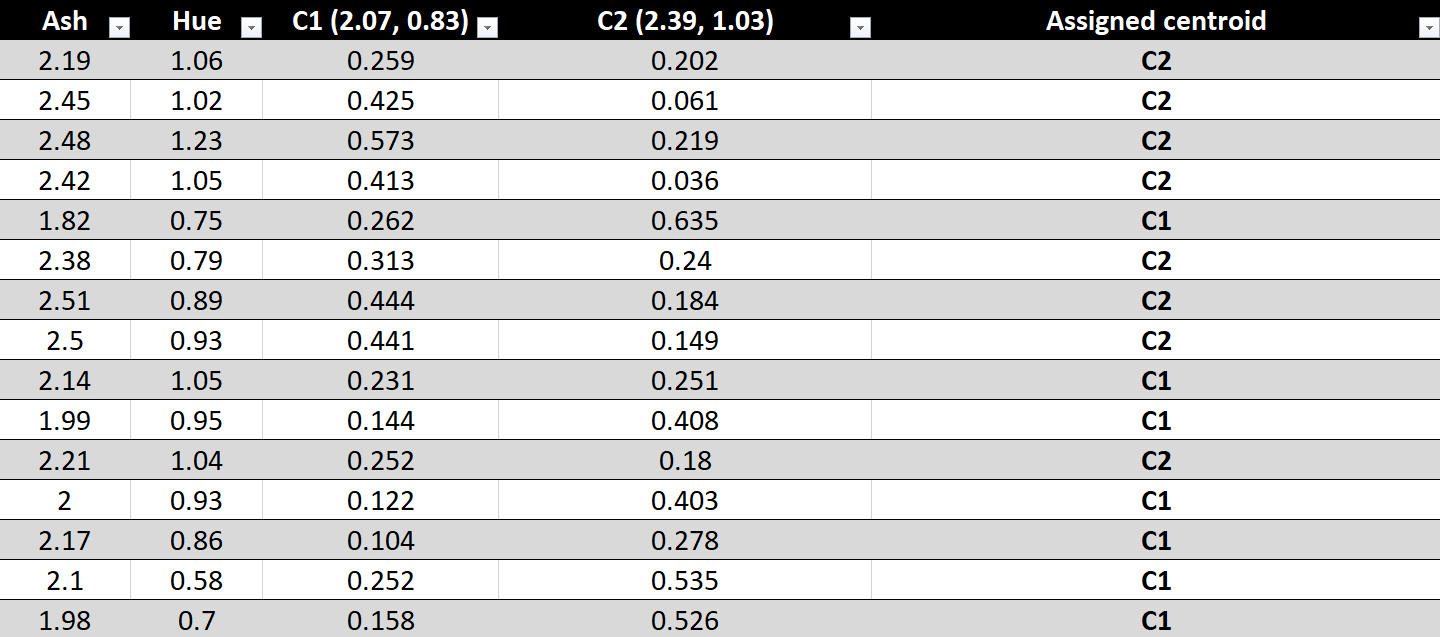

**By observing the above tables we did not find any dissimilarity except $(2.38, 0.79)$ point. For the first table, it was in  `Cluster 1` but after updating the centroid it belongs to `Cluster 2`. So, we can place it on either `Cluster 1` or `Cluster 2`**

So, the final clusters are -> `Cluster 1` = $[(1.82, 0.75), (2.14, 1.05), (1.99, 0.95), (2, 0.93), (2.17, 0.86), (2.1, 0.58), (1.98, 0.7)]$

`Cluster 2` = $[(2.19, 1.06), (2.45, 1.02), (2.48, 1.23), (2.42, 1.05), (2.38, 0.79), (2.51, 0.89), (2.5, 0.93), (2.21, 1.04)]$

And **New Centroid**

`C1` = $(2.02, 0.83)$

`C2` = $(2.39, 1.00)$

In [3]:
X_kmeans.values.tolist()

[[2.19, 1.06],
 [2.45, 1.02],
 [2.48, 1.23],
 [2.42, 1.05],
 [1.82, 0.75],
 [2.38, 0.79],
 [2.51, 0.89],
 [2.5, 0.93],
 [2.14, 1.05],
 [1.99, 0.95],
 [2.21, 1.04],
 [2.0, 0.93],
 [2.17, 0.86],
 [2.1, 0.58],
 [1.98, 0.7]]

### Task 1.1.2 (3 points)
<span style='color: green'>**\[Compute by hand\]**</span> <br>
A) Using examples, show why the k-means algorithm may not find the global optimum. <br>

*******************
**YOUR ANSWER HERE**
******************

**Let take these 5 points:**
$A(1,1), B(2,1), C(4,3), D(5,4), E(8,8)$
and suppose, $k = 2$

Initialize Cluster Centers (Randomly Chosen)
Let’s assume we randomly select $A(1,1)$ and $E(8,8)$ as the initial centroids.

Then Assign Each Point to the Nearest Cluster
We calculate the distance of each point to the centroids:
 - Distance from A(1,1) to:
 - A(1,1) = 0 (belongs to Cluster 1)
 - B(2,1) = 1 (belongs to Cluster 1)
 - C(4,3) = 3.61 (belongs to Cluster 1)
 - D(5,4) = 5 (belongs to Cluster 1)
 - E(8,8) = 9.89 (belongs to Cluster 2)

Distance from E(8,8) to:
 - A(1,1) = 9.89 (belongs to Cluster 1)
 - B(2,1) = 9 (belongs to Cluster 1)
 - C(4,3) = 5.66 (belongs to Cluster 1)
 - D(5,4) = 5 (belongs to Cluster 1)
 - E(8,8) = 0 (belongs to Cluster 2)
After assigning points:
 - Cluster 1: A(1,1), B(2,1), C(4,3), D(5,4)
 - Cluster 2: E(8,8)

Now, Compute New Centroids
 - New centroid for Cluster 1: Mean of (1,1), (2,1), (4,3), (5,4)
   
 ${(1+2+4+5)/4, (1+1+3+4)/4} = (3,2.25)$
 - New centroid for Cluster 2 remains (8,8).

**The algorithm converges here, trapped in a suboptimal solution when we try to update the values of new centroid**

**However, If we had chosen C(4,3) and E(8,8) as the initial centroids instead, the clustering could have been different and possibly better in terms of minimizing the total distance. K-Means relies on random initialization, so it can sometimes settle in a local minimum instead of the global clustering.**

**Observations**
 - Sum-of-squares minimization is non-convex, meaning multiple local minima exist.
 - Poorly (randomly) chosen centroid.
 - If updates are locally optimal, no guarantee of global optimal.


<span style='color: green'>**\[Motivate\]**</span> <br>
B) K-means vs K-medoids: Which performs better when the dataset contains outliers, and why?

*******************
**YOUR ANSWER HERE**
******************

**K-medoids is better than K-means in terms of managing outliers. The main reason is k-medoids selects actual datapoints from clusters which is not more into extreme values. On the other hand K-means uses mean value which is sensitive to the outliers.**

**For example ->** 

suppose, $[2, 3, 4, 5, 40]$ are the group of numbers.

**For K-means** = $2+3+4+5+40/5 = 54/5 = 10.8$ is a center which is far away from the actual centroid. So that, it makes the cluster center inaccurate. 

**For K-medoids** = It picks one of the actual value as the center (e,g. 4) by negating the extreme value.

### Task 1.1.3 (4 points)
<span style='color: green'>**\[Compute by hand\]**</span> the dendrogram for the dataset of Task 1.1.1. using **complete-link**.

*******************
**YOUR ANSWER HERE**
******************

|   | A    | B    | C    | D    | E    | F    | G    | H    | I    | J    | K    | L    | M    | N    | O    |
|---|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|
| A | 0    | 0.26 | 0.34 | 0.23 | 0.48 | 0.33 | 0.36 | 0.34 | 0.05 | 0.23 | 0.03 | 0.23 | 0.20 | 0.49 | 0.42 |
| B | 0.26 | 0    | 0.21 | 0.04 | 0.69 | 0.24 | 0.14 | 0.10 | 0.31 | 0.47 | 0.24 | 0.46 | 0.32 | 0.56 | 0.57 |
| C | 0.34 | 0.21 | 0    | 0.19 | 0.82 | 0.45 | 0.34 | 0.30 | 0.38 | 0.56 | 0.33 | 0.57 | 0.48 | 0.75 | 0.73 |
| D | 0.23 | 0.04 | 0.19 | 0    | 0.67 | 0.26 | 0.18 | 0.14 | 0.28 | 0.44 | 0.21 | 0.44 | 0.31 | 0.57 | 0.56 |
| E | 0.48 | 0.69 | 0.82 | 0.67 | 0    | 0.56 | 0.70 | 0.70 | 0.44 | 0.26 | 0.49 | 0.25 | 0.37 | 0.33 | 0.17 |
| F | 0.33 | 0.24 | 0.45 | 0.26 | 0.56 | 0    | 0.16 | 0.18 | 0.35 | 0.42 | 0.30 | 0.40 | 0.22 | 0.35 | 0.41 |
| G | 0.36 | 0.14 | 0.34 | 0.18 | 0.70 | 0.16 | 0    | 0.04 | 0.40 | 0.52 | 0.34 | 0.51 | 0.34 | 0.51 | 0.56 |
| H | 0.34 | 0.10 | 0.30 | 0.14 | 0.70 | 0.18 | 0.04 | 0    | 0.38 | 0.51 | 0.31 | 0.50 | 0.34 | 0.53 | 0.57 |
| I | 0.05 | 0.31 | 0.38 | 0.28 | 0.44 | 0.35 | 0.40 | 0.38 | 0    | 0.18 | 0.07 | 0.18 | 0.19 | 0.47 | 0.38 |
| J | 0.23 | 0.47 | 0.56 | 0.44 | 0.26 | 0.42 | 0.52 | 0.51 | 0.18 | 0    | 0.24 | 0.02 | 0.20 | 0.39 | 0.25 |
| K | 0.03 | 0.24 | 0.33 | 0.21 | 0.49 | 0.30 | 0.34 | 0.31 | 0.07 | 0.24 | 0    | 0.24 | 0.18 | 0.47 | 0.41 |
| L | 0.23 | 0.46 | 0.57 | 0.44 | 0.25 | 0.40 | 0.51 | 0.50 | 0.18 | 0.02 | 0.24 | 0    | 0.18 | 0.36 | 0.23 |
| M | 0.20 | 0.32 | 0.48 | 0.31 | 0.37 | 0.22 | 0.34 | 0.34 | 0.19 | 0.20 | 0.18 | 0.18 | 0    | 0.29 | 0.25 |
| N | 0.49 | 0.56 | 0.75 | 0.57 | 0.33 | 0.35 | 0.51 | 0.53 | 0.47 | 0.39 | 0.47 | 0.36 | 0.29 | 0    | 0.17 |
| O | 0.42 | 0.57 | 0.73 | 0.56 | 0.17 | 0.41 | 0.56 | 0.57 | 0.38 | 0.25 | 0.41 | 0.23 | 0.25 | 0.17 | 0    |

**Here, we can see that the smallest distance is from `J` to `L` and we can consider these points in `C1`. However, we should continue to get the overall clusters.** 

**e.g., then the smallest distance is between `A` and `K`, and so on..** 

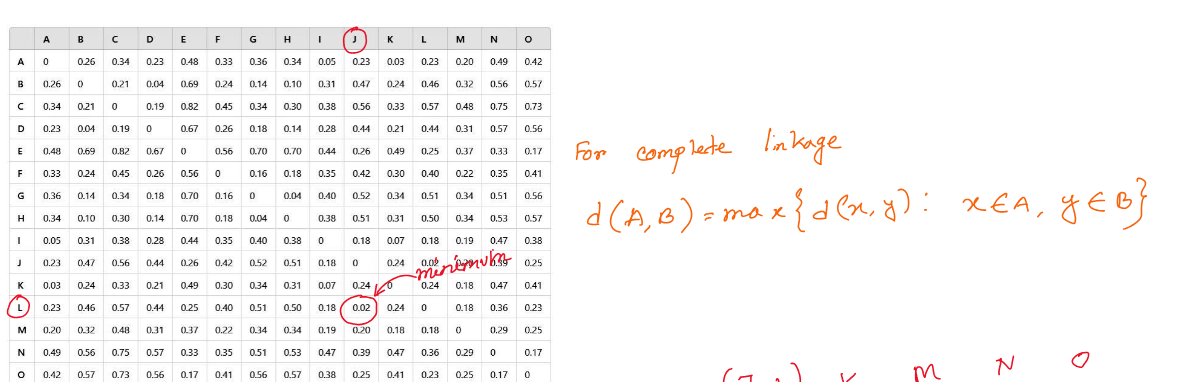

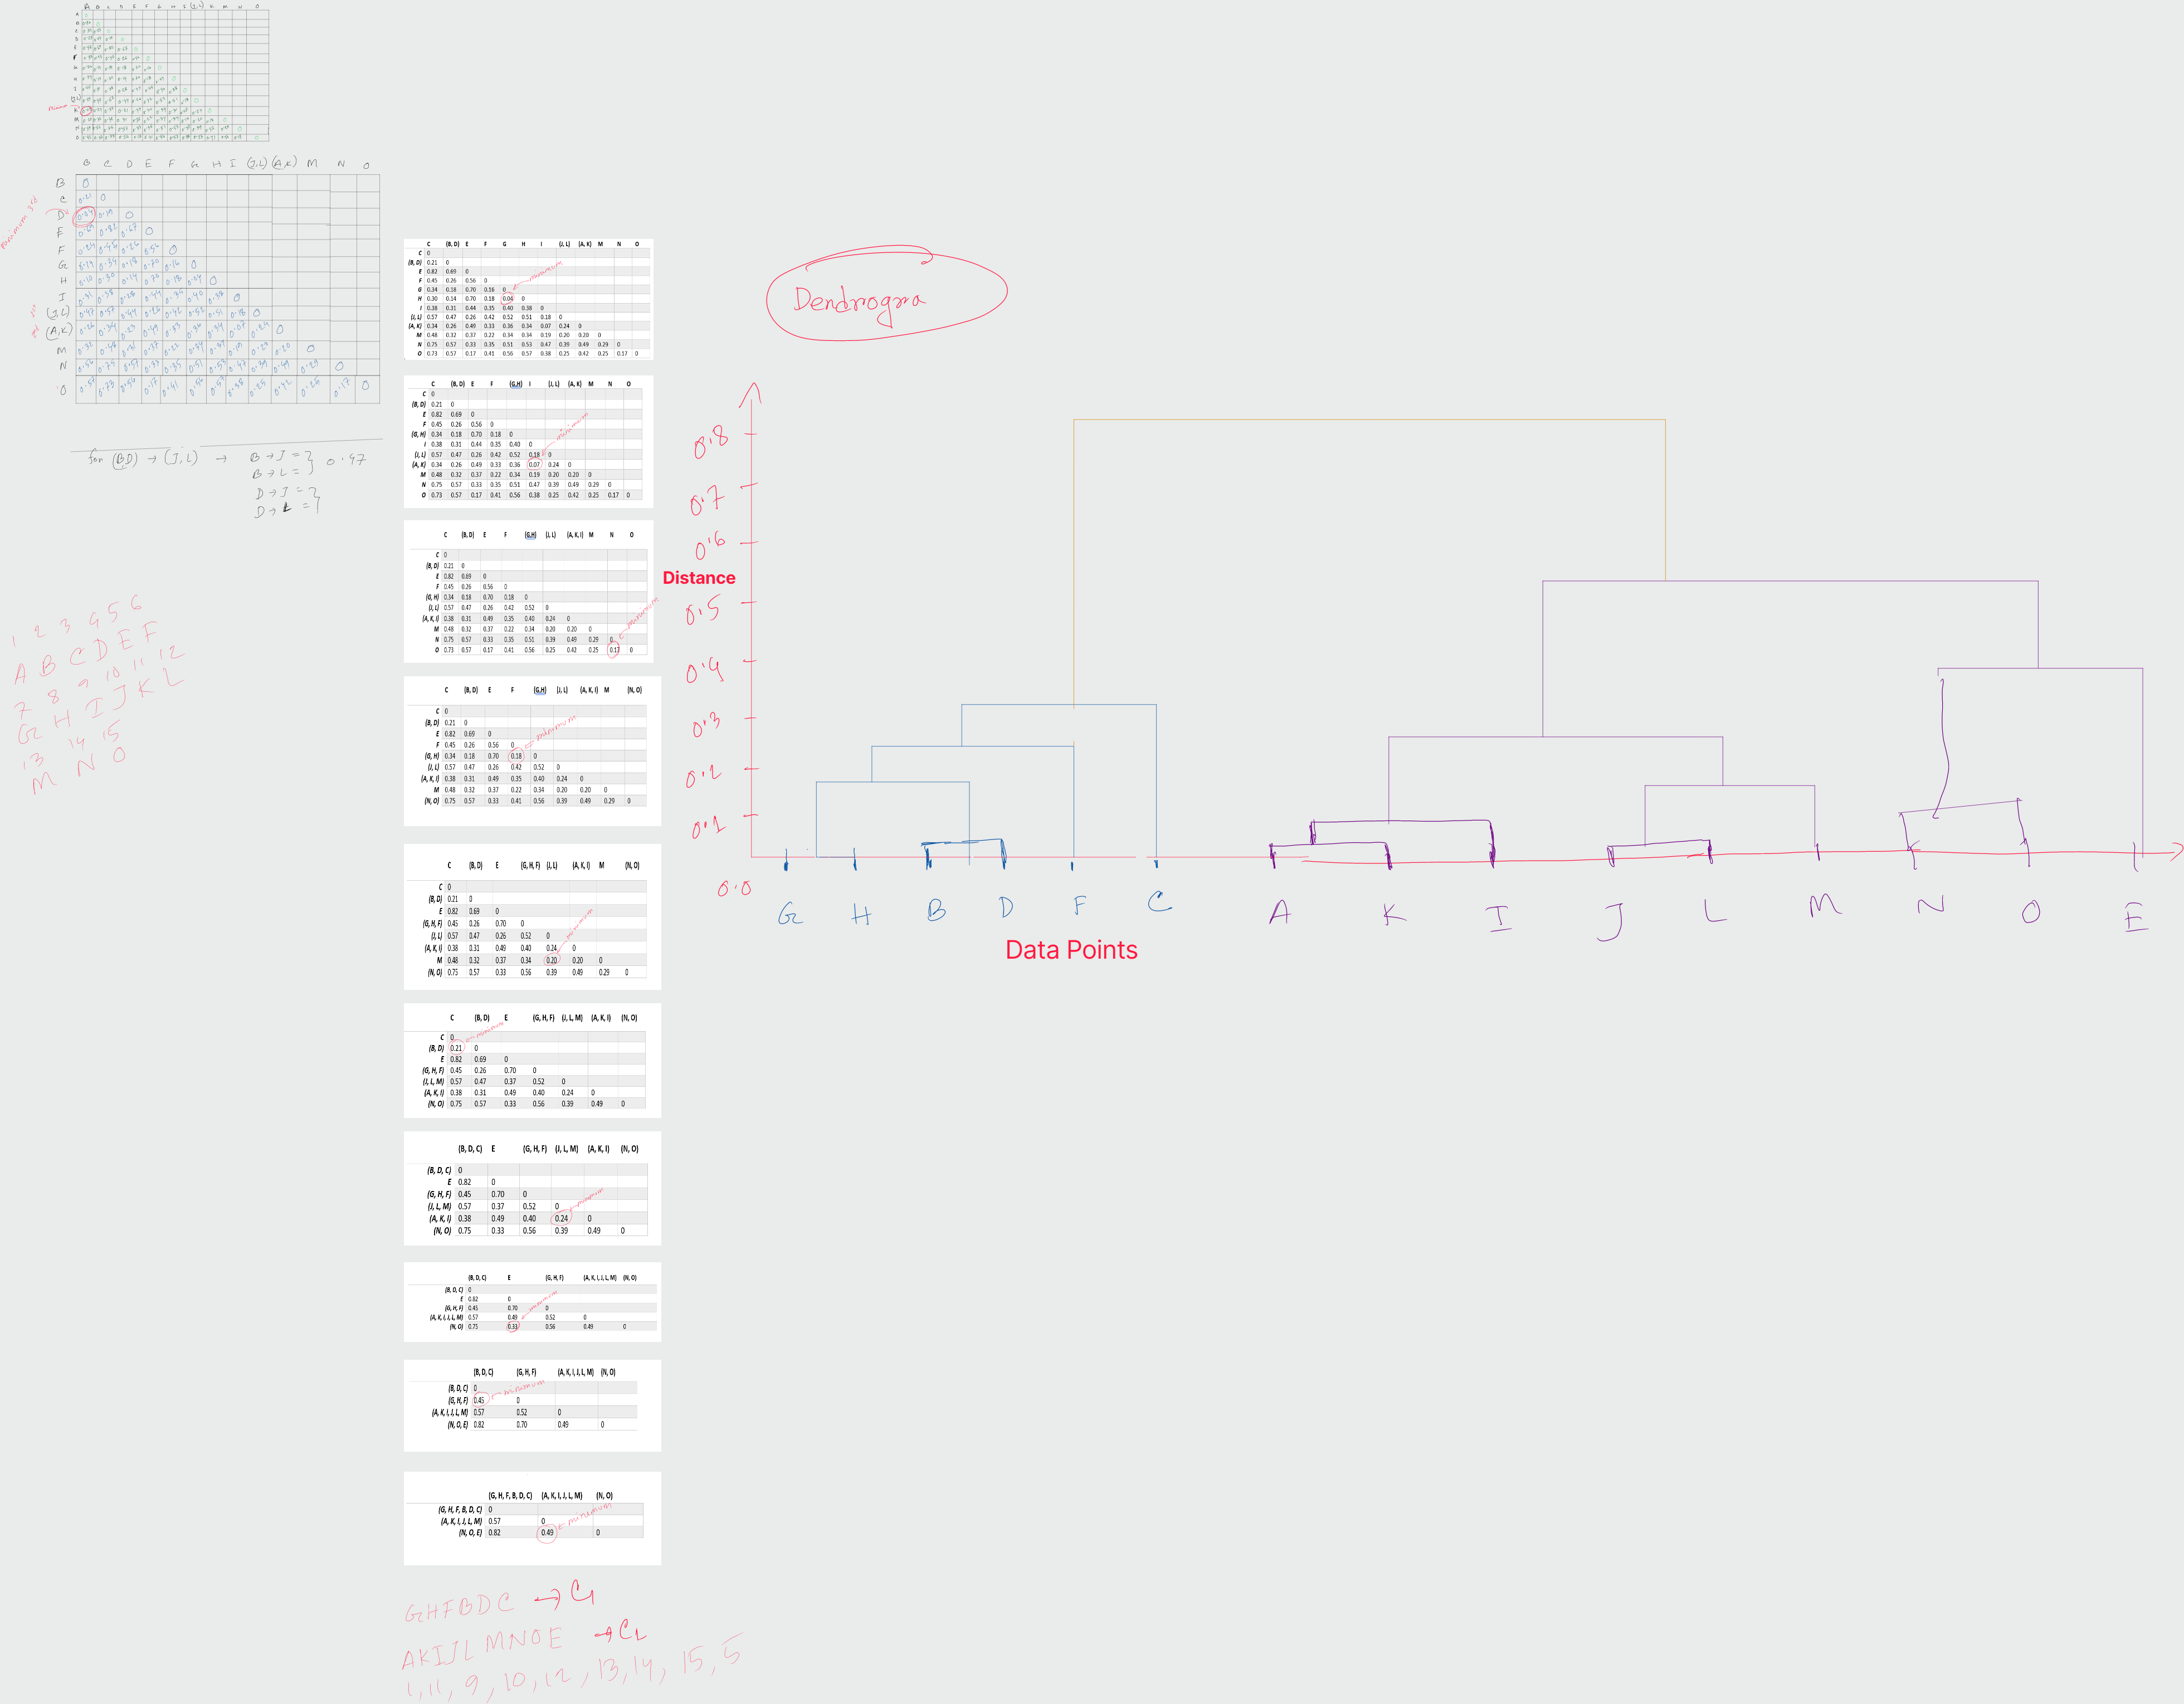

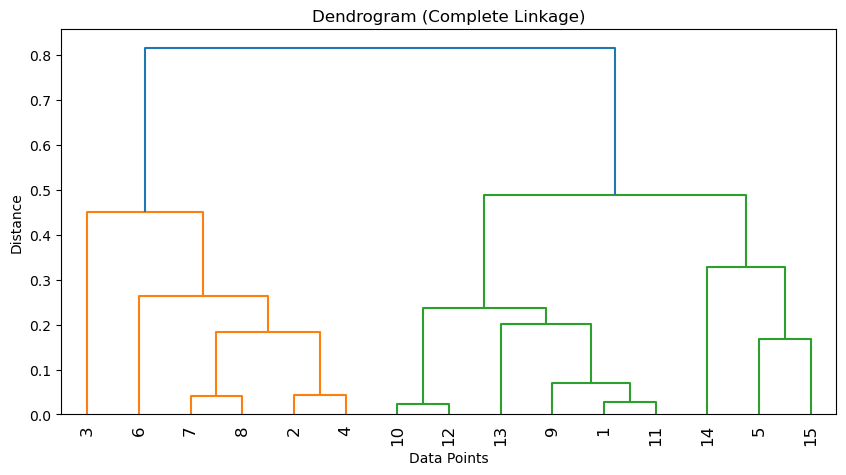

In [4]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Given data points
data = np.array([
    [2.19, 1.06],
    [2.45, 1.02],
    [2.48, 1.23],
    [2.42, 1.05],
    [1.82, 0.75],
    [2.38, 0.79],
    [2.51, 0.89],
    [2.50, 0.93],
    [2.14, 1.05],
    [1.99, 0.95],
    [2.21, 1.04],
    [2.00, 0.93],
    [2.17, 0.86],
    [2.10, 0.58],
    [1.98, 0.70]
])

# Perform hierarchical clustering using complete linkage
linkage_matrix = sch.linkage(data, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(linkage_matrix, labels=np.arange(1, 16), leaf_rotation=90)
plt.title("Dendrogram (Complete Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

### Task 1.1.4 (3 points)
A) <span style='color: green'>**\[Compute by hand\]**</span> the density-based clustering DBSCAN for the dataset of Task 1.1.1 using $\epsilon=0.2$ and $MinPts=3$. Present at least 2 iterations of the algorithm<br> 


*******************
**YOUR ANSWER HERE**
******************

**We label the points first**

P1 to P15 as there is 15 points.

**Iteration 1:**

Now, we need to calculate the Euclidean distance from the any non-visited point to all other points. Below is the table:

$ED = \sqrt{(x1-x2)^2 + (y1-y2)^2}$

$ED (P1, P2) = \sqrt{(2.19-2.45)^2 + (1.06-1.02)^2} = 0.263$

| Point |   X   |   Y   | Distance_from_P1 |
|:-----:|:-----:|:-----:|:----------------:|
|  P1   | 2.19  | 1.06  |     0.000        |
|  P2   | 2.45  | 1.02  |     0.263        |
|  P3   | 2.48  | 1.23  |     0.336        |
|  P4   | 2.42  | 1.05  |     0.230        |
|  P5   | 1.82  | 0.75  |     0.483        |
|  P6   | 2.38  | 0.79  |     0.330        |
|  P7   | 2.51  | 0.89  |     0.362        |
|  P8   | 2.50  | 0.93  |     0.336        |
|  P9   | 2.14  | 1.05  |     0.051        |
| P10   | 1.99  | 0.95  |     0.228        |
| P11   | 2.21  | 1.04  |     0.028        |
| P12   | 2.00  | 0.93  |     0.230        |
| P13   | 2.17  | 0.86  |     0.201        |
| P14   | 2.10  | 0.58  |     0.488        |
| P15   | 1.98  | 0.70  |     0.417        |



By observing the above table we can say **P1 is a Core point** because its $\epsilon$-neighbours {P9, P11} < $\epsilon = 0.2$, So that P1 has 2 neighbours + itself = 3 >= MinPts 3. 

Again, we need to compute the ED from P2 to all other points.

However, we can also check whether **P9 is a core point or not?** Then we need to calculate the distance of P9 to all other points and merge it in one cluster. 

**Iteration 2:**

$ED (P9, P2) = \sqrt{(2.14-2.45)^2 + (1.05-1.02)^2} = 0.311$

| Point |   X   |   Y   | Distance_from_P9 |
|:-----:|:-----:|:-----:|:----------------:|
|  P1   | 2.19  | 1.06  |     0.051        |
|  P2   | 2.45  | 1.02  |     0.311        |
|  P3   | 2.48  | 1.23  |     0.385        |
|  P4   | 2.42  | 1.05  |     0.280        |
|  P5   | 1.82  | 0.75  |     0.439        |
|  P6   | 2.38  | 0.79  |     0.354        |
|  P7   | 2.51  | 0.89  |     0.403        |
|  P8   | 2.50  | 0.93  |     0.379        |
|  P9   | 2.14  | 1.05  |     0.000        |
| P10   | 1.99  | 0.95  |     0.180        |
| P11   | 2.21  | 1.04  |     0.071        |
| P12   | 2.00  | 0.93  |     0.184        |
| P13   | 2.17  | 0.86  |     0.192        |
| P14   | 2.10  | 0.58  |     0.472        |
| P15   | 1.98  | 0.70  |     0.385        |


By observing the above table we can say **P9 is a Core point** because its $\epsilon$-neighbours {P1, P10, P11, P12, P13} < $\epsilon = 0.2$, So that P9 has 5 neighbours + itself = 6 >= MinPts 3.

**Observation:**
- Now, expand: for each neighbor (e.g., P11), check if it is core.
- Those neighbors (P11, P12, P13) are also either core or border, so they join the cluster. This chain continues until no new points can be added.
- C1 = {P1, P9, P10, P11, P12, P13}.
- C2 = {P2, P3, P4, P6, P7, P8}
- C3 = {P5, P14, P15}
- There is **no noise** in the data.

| Point | Coordinates   | Cluster |   Type   |
|:-----:|:-------------:|:-------:|:--------:|
| P1    | (2.19, 1.06)  |    1    |   CORE   |
| P2    | (2.45, 1.02)  |    2    |   CORE   |
| P3    | (2.48, 1.23)  |    2    |  BORDER  |
| P4    | (2.42, 1.05)  |    2    |   CORE   |
| P5    | (1.82, 0.75)  |    3    |  BORDER  |
| P6    | (2.38, 0.79)  |    2    |   CORE   |
| P7    | (2.51, 0.89)  |    2    |   CORE   |
| P8    | (2.50, 0.93)  |    2    |   CORE   |
| P9    | (2.14, 1.05)  |    1    |   CORE   |
| P10   | (1.99, 0.95)  |    1    |   CORE   |
| P11   | (2.21, 1.04)  |    1    |   CORE   |
| P12   | (2.00, 0.93)  |    1    |   CORE   |
| P13   | (2.17, 0.86)  |    1    |   CORE   |
| P14   | (2.10, 0.58)  |    3    |  BORDER  |
| P15   | (1.98, 0.70)  |    3    |   CORE   |

Point Index | Coordinates        | Cluster Label | Type
--------------------------------------------------------
         0 | [2.19 1.06] |             0 | CORE
         1 | [2.45 1.02] |             1 | CORE
         2 | [2.48 1.23] |             1 | BORDER
         3 | [2.42 1.05] |             1 | CORE
         4 | [1.82 0.75] |             2 | BORDER
         5 | [2.38 0.79] |             1 | CORE
         6 | [2.51 0.89] |             1 | CORE
         7 | [2.5  0.93] |             1 | CORE
         8 | [2.14 1.05] |             0 | CORE
         9 | [1.99 0.95] |             0 | CORE
        10 | [2.21 1.04] |             0 | CORE
        11 | [2.   0.93] |             0 | CORE
        12 | [2.17 0.86] |             0 | CORE
        13 | [2.1  0.58] |             2 | BORDER
        14 | [1.98 0.7 ] |             2 | CORE


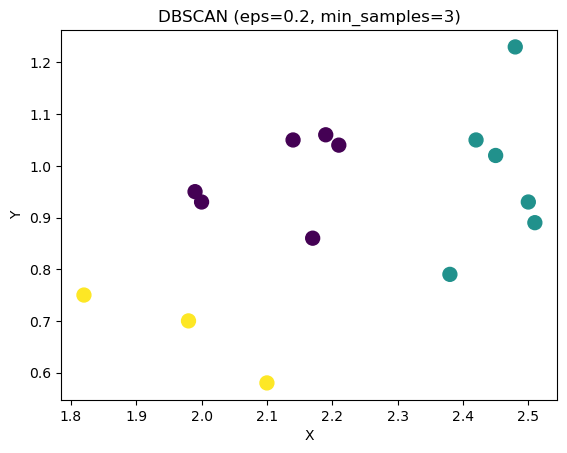

In [5]:
# Checking the validity of our answer
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

data = np.array([
    [2.19, 1.06],
    [2.45, 1.02],
    [2.48, 1.23],
    [2.42, 1.05],
    [1.82, 0.75],
    [2.38, 0.79],
    [2.51, 0.89],
    [2.50, 0.93],
    [2.14, 1.05],
    [1.99, 0.95],
    [2.21, 1.04],
    [2.00, 0.93],
    [2.17, 0.86],
    [2.10, 0.58],
    [1.98, 0.70]
])


# eps=0.2 (radius), min_samples=3 (i.e., at least 3 points in neighborhood to be core)
dbscan = DBSCAN(eps=0.2, min_samples=3)
labels = dbscan.fit_predict(data)

core_sample_indices = dbscan.core_sample_indices_  
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[core_sample_indices] = True

print("Point Index | Coordinates        | Cluster Label | Type")
print("--------------------------------------------------------")

for i, point in enumerate(data):
    cluster_label = labels[i]
    
    if cluster_label == -1:
        print(f"{i:10d} | {point} | {cluster_label:13d} | NOISE")
    else:
        if core_samples_mask[i]:
            print(f"{i:10d} | {point} | {cluster_label:13d} | CORE")
        else:
            print(f"{i:10d} | {point} | {cluster_label:13d} | BORDER")

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", s=100)
plt.title("DBSCAN (eps=0.2, min_samples=3)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



B) <span style='color: green'>**\[Motivate\]**</span> the difference between the clusters obtained with DBSCAN and those obtained with KMeans in Task 1.1.1.

*******************
**YOUR ANSWER HERE**
******************

The first and foremost difference is the cluster size. **KMeans** was forced to find exactly 2 clusters (since k=2), even though **DBSCAN** discovered 3 clusters naturally.

- **DBSCAN** (with the chosen $\epsilon$ and MinPts) and **Kmeans** identified no noise points for this particular data , but **DBSCAN** could have if some points lay in low-density regions.

- **KMeans** merges points together based on their distance to a centroid, whereas **DBSCAN** groups points that are close in “dense neighborhoods,” which can yield more organic, possibly elliptical or irregular shapes.
- If the dataset had **outliers**, **KMeans** would forcibly assign them to the nearest centroid, distorting that cluster. **DBSCAN**, by contrast, can explicitly label them as noise if they don’t belong to any dense region.

## Task 1.2 Elliptic data set (2 points)
<span style='color: green'>**\[Motivate\]**</span> <br> 
After looking at the dataset _below_, you want to detect the red outlier point, assuming you know that it is an outlier. 

Which approach would be the most obvious to find the red outlier? Please (1) check the box and (2) motivate your answer below:
- [ ] Distance based approach (with parameteres $\pi=0.5$, $\epsilon=2$ and euclidean distance)
- [ ] Angle based approach
- [X] Depth based approach

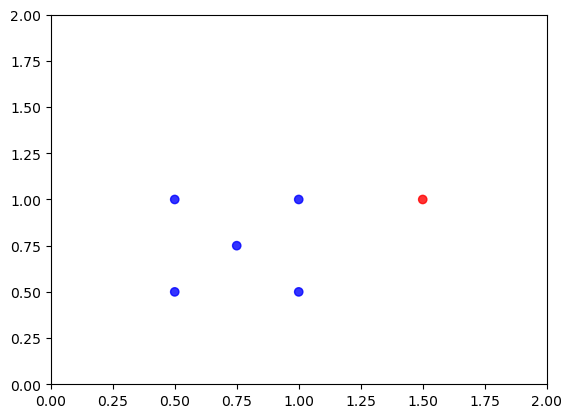

In [6]:
D_new = np.array([[1.5, 1.0], # Red 
                [1., 1.0],
                [0.5, 0.5],
                [1, 0.5],
                [0.5, 1],
                [0.75, 0.75]
                 ])

plt.scatter(D_new[:, 0], D_new[:, 1], alpha=0.8, c = ['red' if i == 0 else 'blue' for i in range(len(D_new))])
plt.axis([0, 2, 0, 2])
plt.show()

*******************
**YOUR ANSWER HERE**
******************

**By observing the data, we can say that the depth based approach is suitable for the red outlier.**

**Depth-based is the most intuitive** because it looks at how centrally located each point is, and the red point is less “deep” (further from the main elliptical shape).

- Otherhand, **Angle-based** methods are useful in high-dimensional data where distances become less meaningful and angular separation can be more informative. 

- Also, **Distance-based** with $\epsilon = 2$ likely will not flag the red point as outlier (the radius is too big).

## Task 1.3 Theoretical questions
### Task 1.3.1 Statistical Analysis (3 points)
<span style='color: green'>**\[Prove\]**</span> 1. Prove that the Euclidean distance is a pseudometric.

*******************
**YOUR ANSWER HERE**
******************

**A distance is pseudometric if it follows:**

- **Positive Semidefinite:**   $d(x,y) \ge 0$
- **Identity of indiscernibles (weak form)**: $d(x,x) = 0$, **without definite form, $d(x,y) = 0$, if $x = y$**
   - (Unlike a true metric, a pseudometric does *not* require $d(x,y) = 0,  x = y$, it can be $x \neq y$
- **Symmetry:** $d(x,y) = d(y,x)$
- **Triangle Enequality:** $d(x, z) \le d(x,y) + d(y,z)$

Euclidean Distance = $\sqrt{\sum_{i=1}^n(x_i-y_i)^2}$

**1. Positive Semidefinite:**
Each term $(x_i-y_i)^2 \ge 0$. Summing non-negative numbers is non-negative, and taking the square root preserves non-negativity. Hence:

$d(x,y) = \sqrt{\sum_{i=1}^n(x_i-y_i)^2} \ge 0$

**2. Identity of indiscernibles (weak form)**:

For any $x \in \mathbb{R}$, 

$\sqrt{\sum_{i=1}^n(x-x)^2} = 0$

Thus $𝑑(𝑥,𝑥)=0 $. (Euclidean distance also satisfies the stronger condition $𝑑(𝑥,𝑦)=0 $ $⟺𝑥=𝑦$ , but for a pseudometric we only need $𝑑(𝑥,𝑥)=0d(x,x)=0.$). Therefore, it is not a requirement to follow $x = y$ it may also follow $x \neq y$. For this reason we can say every metric is also a pseudometric, but not every pseudometric is necessarily a metric. 

**3. Symmetry:**

For any $x, y$,  $d(x,y) = \sqrt{\sum_{i=1}^n(x_i-y_i)^2} = \sqrt{\sum_{i=1}^n(y_i-x_i)^2} = d(y,x)$ 

**4. Triangle Enequality:**
For all $x, y, z \in X$, we can also write $d(x, z) \le d(x,y) + d(y,z)$ (Minkowski inequality for vectors in $\mathbb{R^n}$)

<span style='color: green'>**\[Prove\]**</span> 2. Prove that the sample mean is an unbiased estimator of the population mean.

*******************
**YOUR ANSWER HERE**
******************

We want to show Sample mean$( \bar{X} )$ is an unbiased estimator of the population mean ($\mu$)

We know, mean $(\bar{X}) = \left(\frac{1}{n}\sum_{i=1}^n X_i\right)$

then $E(\bar{X}) = \mu$

**Expectation of the Sample Mean $( \bar{X} )$ (Plugin):**

$
E(\bar{X}) = E\left(\frac{1}{n}\sum_{i=1}^n X_i\right)
$

**Linearity of Expectation:**

$
= \frac{1}{n} \sum_{i=1}^n E(X_i)
$

**Since $( E(X_i) = \mu )$:**

$
= \frac{1}{n} \sum_{i=1}^n \mu
$

**Simplify the Summation:**

$
= \frac{1}{n} \cdot n\mu \quad \text{(since \(\sum_{i=1}^n 1 = n\))}
$

$
= \mu
$


The sample mean $( \bar{X} )$ is an **unbiased estimator** of the population mean $( \mu )$.


**References:**

[1] Sample mean is unbiased estimator of population mean. ProofWiki. (n.d.). https://proofwiki.org/wiki/Sample_Mean_is_Unbiased_Estimator_of_Population_Mean#google_vignette 

<span style='color: green'>**\[Prove\]**</span> 3. Prove that the sample variance is an asymptotically unbiased estimator of the population variance.

*******************
**YOUR ANSWER HERE**
******************

we'll prove that the sample variance $S_n^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X})^2$ is **asymptotically unbiased** for the population variance $\sigma^2$.


**1. Expand the Sample Variance**

expanding the squared term in $S_n^2$:

$$
\sum_{i=1}^n (X_i - \bar{X})^2 = \sum_{i=1}^n X_i^2 - 2\bar{X} \sum_{i=1}^n X_i + n\bar{X}^2
$$

Since $\sum_{i=1}^n X_i = n\bar{X}$, substitute this into the equation:

$$
\sum_{i=1}^n X_i^2 - 2n\bar{X}^2 + n\bar{X}^2 = \sum_{i=1}^n X_i^2 - n\bar{X}^2
$$

Thus, the sample variance becomes:

$$
S_n^2 = \frac{1}{n} \sum_{i=1}^n X_i^2 - \bar{X}^2
$$

**3. Plugin Expectation**

To find $\mathbb{E}[S_n^2]$, we take expectations of both terms:

**Term 1:** $\frac{1}{n} \sum_{i=1}^n X_i^2$

$$
\mathbb{E}\left[\frac{1}{n} \sum_{i=1}^n X_i^2\right] = \frac{1}{n} \sum_{i=1}^n \mathbb{E}[X_i^2]
$$

By definition, $\mathbb{E}[X_i^2] = \text{Var}(X_i) + (\mathbb{E}[X_i])^2 = \sigma^2 + \mu^2$

Therefore:

$$
\mathbb{E}\left[\frac{1}{n} \sum_{i=1}^n X_i^2\right] = \frac{1}{n} \cdot n(\sigma^2 + \mu^2) = \sigma^2 + \mu^2
$$

**Term 2:** $\mathbb{E}[\bar{X}^2]$

First, note that $\bar{X}$ is the sample mean:

$$
\mathbb{E}[\bar{X}^2] = \text{Var}(\bar{X}) + (\mathbb{E}[\bar{X}])^2
$$

- $\mathbb{E}[\bar{X}] = \mu$
- $\text{Var}(\bar{X}) = \frac{\sigma^2}{n}$ (variance of the sample mean)

Thus:

$$
\mathbb{E}[\bar{X}^2] = \frac{\sigma^2}{n} + \mu^2
$$

**3. Combine the Results**

Now subtract the expectation of Term 2 from Term 1:

$$
\mathbb{E}[S_n^2] = \left(\sigma^2 + \mu^2\right) - \left(\frac{\sigma^2}{n} + \mu^2\right) = \sigma^2 - \frac{\sigma^2}{n}
$$

Simplify:

$$
\mathbb{E}[S_n^2] = \sigma^2 \left(1 - \frac{1}{n}\right)
$$

**4. Set the Limit as** $n \to \infty$

As the sample size $n$ grows large, the term $\frac{\sigma^2}{n}$ vanishes:

$$
\lim_{n \to \infty} \mathbb{E}[S_n^2] = \lim_{n \to \infty} \sigma^2 \left(1 - \frac{1}{n}\right) = \sigma^2
$$

Thus, $S_n^2$ is **asymptotically unbiased** for $\sigma^2$.

**5. Observations**

- **Bias in finite samples**: For finite $n$, $\mathbb{E}[S_n^2] = \sigma^2 - \frac{\sigma^2}{n}$, so $S_n^2$ underestimates $\sigma^2$. This is why the **unbiased sample variance** uses $\frac{1}{n-1}$ instead of $\frac{1}{n}$.

- **Asymptotic behavior**: As $n \to \infty$, the adjustment $\frac{\sigma^2}{n}$ becomes negligible. The difference between $\frac{1}{n}$ and $\frac{1}{n-1}$ also vanishes:

$$
\lim_{n \to \infty} \frac{n}{n-1} = 1
$$

- The sample variance $S_n^2$ (with divisor $n$) is biased for finite $n$
- However, as $n \to \infty$, the bias $\frac{\sigma^2}{n} \to 0$, making $S_n^2$ asymptotically unbiased:

$$
{\lim_{n \to \infty} \mathbb{E}[S_n^2] = \sigma^2}
$$

This result underpins the consistency and reliability of sample variance for large datasets.

The plot demonstrates how the biased estimator ($\frac{1}{n}$) approaches the true population variance as $n$ increases, confirming its asymptotic unbiasedness.

**References:**

[2] Variance estimation. (n.d.). Statlect. https://www.statlect.com/fundamentals-of-statistics/variance-estimation

‌

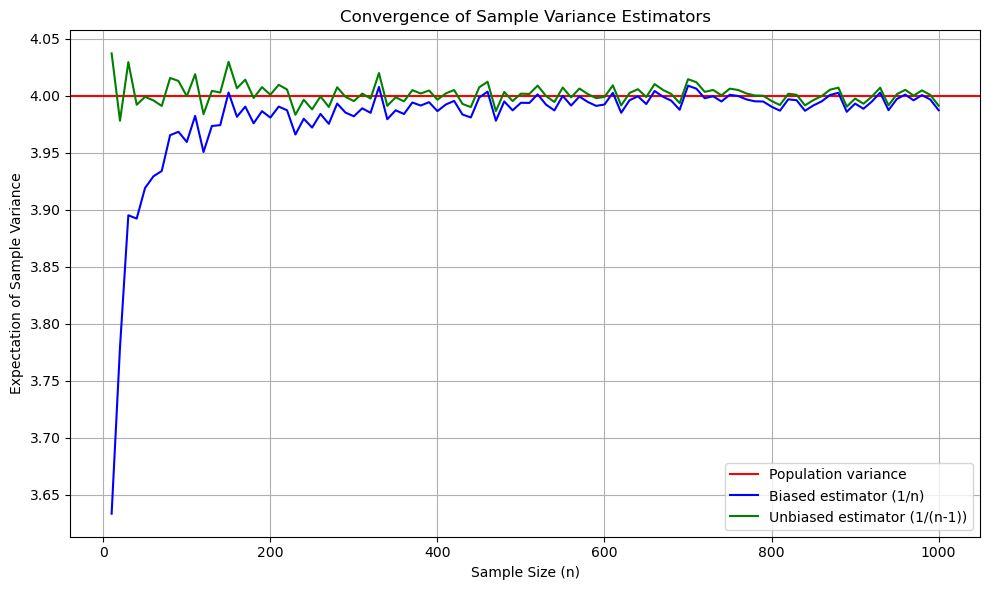

In [34]:
# Checking the validity 
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Population parameters
mu = 5
sigma = 2

# Sample sizes to test
sample_sizes = np.arange(10, 1001, 10)
num_simulations = 1000

# Arrays to store results
biased_variance_means = []
unbiased_variance_means = []

for n in sample_sizes:
    biased_variances = []
    unbiased_variances = []
    
    for _ in range(num_simulations):
        # Generate random sample from normal distribution
        sample = np.random.normal(mu, sigma, size=n)
        
        # Calculate biased and unbiased sample variances
        biased_var = np.sum((sample - np.mean(sample))**2) / n
        unbiased_var = np.sum((sample - np.mean(sample))**2) / (n - 1)
        
        biased_variances.append(biased_var)
        unbiased_variances.append(unbiased_var)
    
    # Store the mean of all simulations for this sample size
    biased_variance_means.append(np.mean(biased_variances))
    unbiased_variance_means.append(np.mean(unbiased_variances))

# Plot the results
plt.figure(figsize=(10, 6))
plt.axhline(y=sigma**2, color='r', linestyle='-', label='Population variance')
plt.plot(sample_sizes, biased_variance_means, 'b-', label='Biased estimator (1/n)')
plt.plot(sample_sizes, unbiased_variance_means, 'g-', label='Unbiased estimator (1/(n-1))')
plt.xlabel('Sample Size (n)')
plt.ylabel('Expectation of Sample Variance')
plt.title('Convergence of Sample Variance Estimators')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 1.3.2 Kernel trick (7 points)
<span style='color: green'>**\[Motivation\]**</span> A) What is a positive-definite kernel $K(x,x')$ of two vectors $x,x'\in\mathbb{R}^n$. 

*******************
**YOUR ANSWER HERE**
******************

A positive definite kernel $K(x,x')$ of two vectors $x,x'\in\mathbb{R}^n$ is a symmetric function that satisfies the following properties:

- **Symmetry:** $K(x,x') = K(x', x)$ for $\forall (x, x') \in\mathbb{R}^n$
- **Positive Semi-definite:** For any finite set of vectors ${x_1, x_2, \dots, x_m} \subset \mathbb{R}^n$ and any real coefficients ${c_1, c_2, \dots, c_m} \subset \mathbb{R}$,
$$\sum_{i=1}^m \sum_{j=1}^m c_i c_j K(x_i, x_j) \geq 0.$$
Equivalently, the Kernel $\mathbf{K}$, defined as $\mathbf{K}_{ij} = K(x_i, x_j)$, must be positive semi-definite (i.e., all eigenvalues of $\mathbf{K}$ are non-negative). **$c^{\top}Kc$**

**Usages**

- Enable kernel trick in SVM to implicitly compute high-dimensional features.
- Ensure optimization problems 
- Guarantee mathematical consistency in similarity-based algorithms.
- Allow for nonlinear decision boundaries in otherwise linear classification methods.

<span style='color: green'>**\[Motivate\]**</span> B) Please explain briefly what is the kernel trick method.

*******************
**YOUR ANSWER HERE**
******************

The **kernel trick** is a mathematical technique to apply linear algorithms to non-linearly separable data by implicitly mapping the input data into a higher-dimensional space. 

**Best for**

- Computational Efficiency: Kernels compute inner products in high dimensions without explicitly constructing the high-dimensional space.
- Flexibility: Use any positive-definite kernel to model complex relationships.
- Non-Linear Decision Boundaries: Enables linear methods to solve non-linear problems.

**ex: Support Vector Machines (SVM): Find non-linear decision boundaries.**

<span style='color: green'>**\[Prove\]**</span> C)
Let two positive-definite kernels $K_1(x,x')$ and $K_2(x,x')$.  <br> Show that functions $K_1(x,x')+K_2(x,x')$ and $K_1(x,x')K_2(x,x')$ are also positive-definite kernels.

*******************
**YOUR ANSWER HERE**
******************

To prove, $K_1(x,x')+K_2(x,x')$ and $K_1(x,x')K_2(x,x')$ are also positive-definite kernels, we have to verify *2* properties of positive kernel:

**1. Symmeetry:** The both notions (addition and multiplication) are symmetry by nature, as we can write $x + y = y + x$ and $x * y = y * x$

**2. Positive semi-definite:** For any finite set of vectors ${x_1, x_2, \dots, x_m} \subset \mathbb{R}^n$ and any real coefficients ${c_1, c_2, \dots, c_m} \subset \mathbb{R}$,
$$\sum_{i=1}^m \sum_{j=1}^m c_i c_j K(x_i, x_j) \geq 0.$$

Then, for $$K_1(x, x') + K_2(x, x')$$

we can write: $$\sum_{i=1}^m \sum_{j=1}^m c_i c_j (K_1(x_i, x_j') + K_2(x_i, x_j'))$$

Again, for $$K_1(x, x') * K_2(x, x')$$

we can write: $$\sum_{i=1}^m \sum_{j=1}^m c_i c_j (K_1(x_i, x_j') * K_2(x_i, x_j'))$$

Thus, the both varifies those properties. Therefore, they are positive-definite kernels.

<span style='color: green'>**\[Prove\]**</span> D) Prove that $K(x,x')=e^{2 ln(x^{\top}x')-(x-x')^{\top}(x-x')}$ is a positive-definite kernel. 

*******************
**YOUR ANSWER HERE**
******************

To prove, $K(x,x')=e^{2 ln(x^{\top}x')-(x-x')^{\top}(x-x')}$, we need to check the 2 properties:

**1. Symmetry:** $K(x,x') = K(x', x)$ for $\forall (x, x') \in\mathbb{R}^n$

Here, 

$K(x,x') = e^{2 ln(x^{\top}x') - (x-x')^{\top}(x-x')}$
    
$ = e^{ln(x^{\top}x')^2 - (x-x')^{\top}(x-x')}$

$ = (x^{\top}x')^2 - (x-x')^{\top}(x-x')$

Now, we can write: $ = (x'^{\top}x)^2 - (x'-x)^{\top}(x'-x)$, because $(x-x')^{\top}(x-x') = (x'-x)^{\top}(x'-x)$

Thus, $K(x,x') = K(x', x)$ **[symmetry].**

**2. Positive semi-definite:** $c^{\top}Kc \ge 0$

Here, $ln(x^{\top}x') > 0$, and the second term,  $(x-x')^{\top}(x-x')$ is the squared Euclidean distance which is non-negetive. Thus $K(x,x')=e^{2 ln(x^{\top}x')-(x-x')^{\top}(x-x')}$ is positive-definite kernel.

# Part 2 Exploratory data analysis
In this section, you will perform preliminary analysis on your data. These preliminary analysis are useful to understand how the data behaves, before running complex algorithms.<br>



In [8]:
toy = df
data_np = toy.to_numpy()
headers = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium','total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue','od280/od315_of_diluted_wines', 'proline', 'target']
X = data_np[:,3:]
y = data_np[:,11]
rows, cols = np.shape(X)
toy.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [35]:
df.corr()

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
target                       -0.328222    0.437776 -0.049643   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   
target                                 0.517859  -0.209179      -0.719163   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   
target                         -0.847498              0.489109   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315

## Task 2.1 Correlation matrix
### Task 2.1.1 (5 points)
A) <span style='color: green'>**\[Implement\]**</span> in the code-box below the **correlation matrix** (not covariance matrix) among all the attributes. <br>
<font color='red'>To CHECK your results you can use **numpy.corrcoef**.</font>

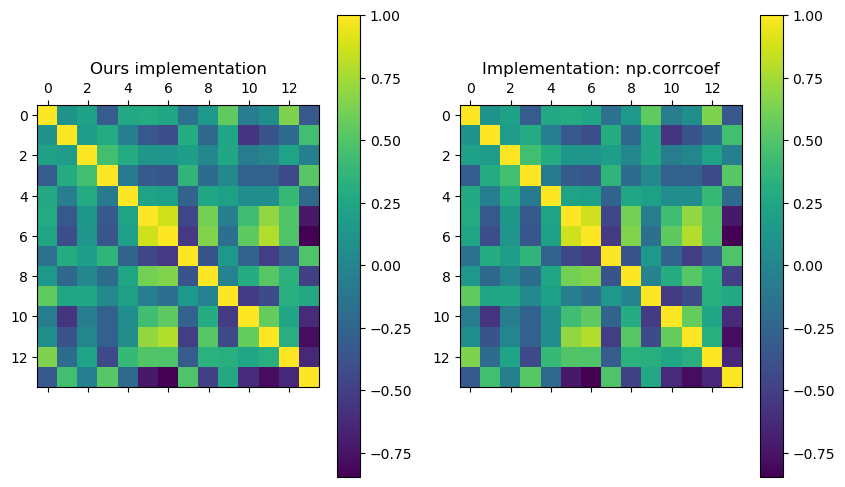

In [49]:
def correlation_matrix(X):
    corr = None
    # YOUR CODE HERE
    X = X.astype(float)

    num_vars = len(X[0])
    n = len(X)
    corr = np.zeros((num_vars, num_vars))

    for i in range (num_vars):
        for j in range (num_vars): 
            mean_i = np.mean(X[:, i])
            mean_j = np.mean(X[:, j])
            numerator = np.sum((X[:, i] - mean_i) * (X[:, j] - mean_j))
            denominator = np.sqrt(np.sum((X[:, i] - mean_i)**2) * np.sum((X[:, j] - mean_j)**2))
            corr [i, j] = numerator/denominator 
    
    # YOUR CODE HERE 
    return corr
    
X = data_np
Corr = correlation_matrix(X)
#validity with corrcoef
c = np.corrcoef(X, rowvar=False)

plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.title("Ours implementation")
plt.matshow(Corr, fignum=0)
plt.colorbar()

#validity 
plt.subplot(122)
plt.title("Implementation: np.corrcoef")
plt.matshow(c, fignum=0)
plt.colorbar()
plt.show()

<span style='color: green'>**\[Motivate\]**</span><br>
B) By observing the  **correlation matrix** in A), which pair(s) of different features has the highest correlation?

*******************
**YOUR ANSWER HERE**
******************

By observing the above heatmap, we can see that **`total_phenols` and `flavanoids`** has the highest correlation.

Then, **`flavanoids` and `dialuted_wines`**

and then **`total_phenols` and `dialuted_wines`**

<span style='color: green'>**\[Motivate\]**</span><br>
C) What does it mean that two features are highly correlated? <br>

*******************
**YOUR ANSWER HERE**
******************

When two features are **highly correlated,** it means there is a **strong linear relationship** between them. Their values tend to change together in a predictable way, either in the same direction (positive correlation) or opposite directions (negative correlation).

<span style='color: green'>**\[Motivate\]**</span><br>
D) Based on the features of the data in Part 2 and your answer in C), did you expect the observation of B)? <br>

*******************
**YOUR ANSWER HERE**
******************

Here, we can see that the **`total_phenols`** has a strong correlation with **`flavanoids`** and with the increase of one affects another. Also they hold positive correlation. 

In [65]:
toy.iloc[:5,5:7]

total_phenols  flavanoids
0           2.80        3.06
1           2.65        2.76
2           2.80        3.24
3           3.85        3.49
4           2.80        2.69

### Task 2.1.2 (2 points)
<span style='color: green'>**\[Motivate\]**</span><br>

Plot the correlation matrix running the code below. (You may need to zoom on it)
What is the relationship between the correlation matrix and the covariance matrix? (1) Check the correct box below and (2) motivate your answer.

- [ ] The correlation matrix contains the unnormalized covariance values
- [ ] The correlation matrix contains the normalized covariance values
- [ ] The covariance matrix contains the variance of the correlation

<font color='red'>Do NOT just choose an answer. Please clarify WHY this is the correct answer.</font>

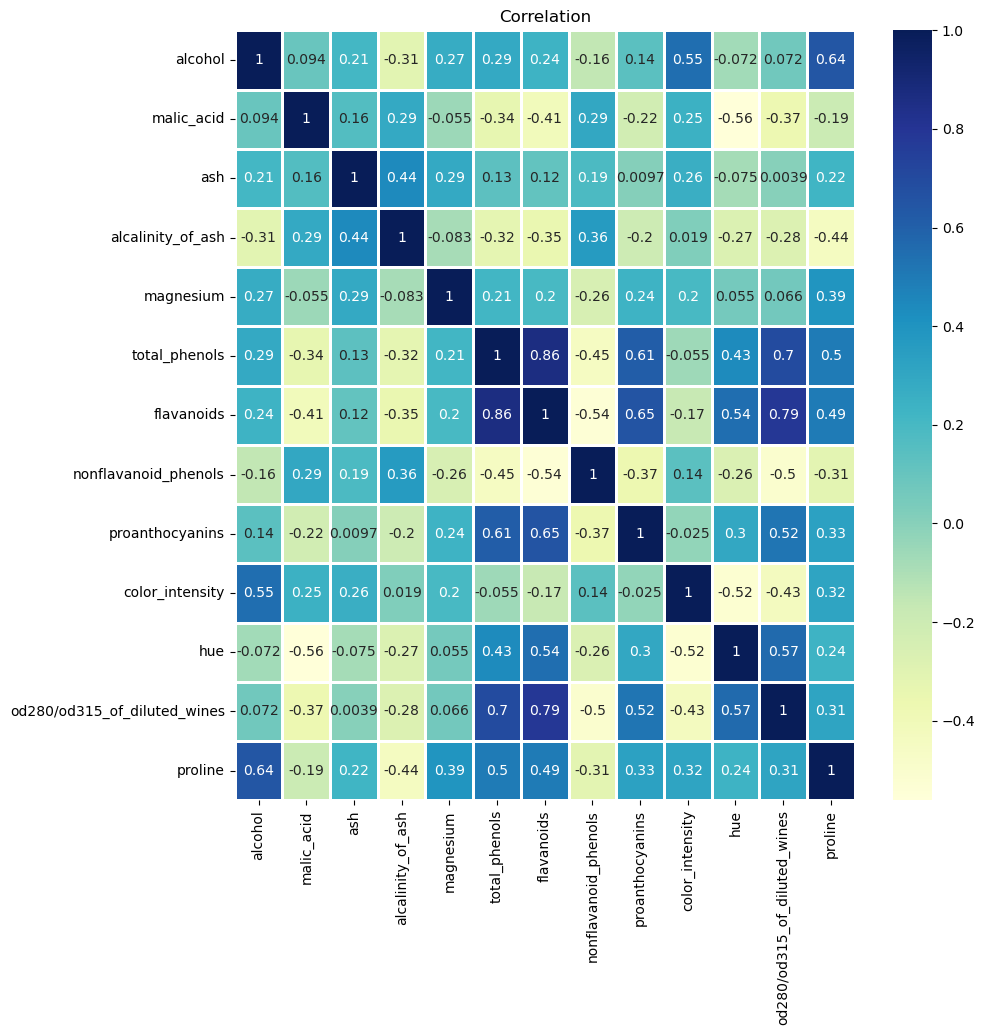

In [10]:
df_to_plot = df.drop(['target'],axis=1)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_to_plot.corr(),annot=True,linewidths=1, cmap="YlGnBu", annot_kws={"fontsize":10}, vmax=1, ax=ax)
plt.title('Correlation')
plt.show()

*******************
**YOUR ANSWER HERE**
******************

### Task 2.1.3 (3 points)

In this task, we reason about the covariance matrices.

<span style='color: green'>**\[Implement\]**</span> code for normalizing the features of the wine dataset using (1) standard score normalization and (2) range normalization. Finally, (3) plot the **covariance** matrices for
1. The unnormalized data
2. The [standard score normalized features](https://en.wikipedia.org/wiki/Standard_score)
3. The range (min-max) normalized features

In [11]:
# Data
X = data_np

# YOUR CODE HERE


# YOUR CODE HERE

### Task 2.1.4 (2 points)
<span style='color: green'>**\[Motivate\]**</span> how the covariance matrix changes with different normalization schemes and reason on why such behaviour appears.
You should notice some differences. (1) Check the correct box below and (2) motivate your answer.



- [ ] Range normalization preserves the variance. Therefore, features are directly comparable within the matrix.
- [ ] Standard score normalization preserves the variance. Therefore, features are directly comparable within the matrix.
- [ ] Both methods normalize in such a way, that it makes sense to compare the different covariance values to each other within the matrix. 
- [ ] None of the methods normalize in such a way that it makes sense to compare the different covariance values to each other.

<font color='red'>Do NOT just choose an answer. Please clarify WHY this is the correct answer.</font>

*******************
**YOUR ANSWER HERE**
******************

## Task 2.2 Normal distribution
### Task 2.2.1 (4 points)
Sometimes it is convenient to know whether a variable is close to a normal distribution.

<span style='color: green'>**\[Implement\]**</span> a method norm_dist that: <br>
    
1) **Inputs**: 
    * the number of buckets $b$ 
    * a vector $x$ of values 
2) First, compute the histogram of a Gaussian variable with mean $\mu$ corresponding to the sample mean of $x$ and $\sigma^2$ corresponding to the sample variance of $x$. Second, calculate the histogram of $x$ using $b$ buckets. 
3) **Output**: the sum of the absolute differences of the buckets between the two histograms computed in 2). The sum of the differences is computed as 
$$\sum_{i=1}^b |H_X(i) - H_{\mathcal{N}}(i)|$$ 
where $H_X(i)$ is the i-th bucket of the histogram of $x$ and $H_\mathcal{N}(i)$ is the i-th bucket of the hisotgram obtained from the normal distribution $\mathcal{N}(\mu,\sigma^2)$. 

<font color='red'>You can use the norm function from Scipy to get the normal distribution to subtract from.</font>

In [12]:
from scipy.stats import norm

## Our data comes from the variable X
X = data_np
def norm_dist(x, b): 
    dist = 0
    ### YOUR CODE HERE
    
    
    ### YOUR CODE HERE
    return dist

### Task 2.2.2 (6 point)
A) <span style='color: green'>**\[Motivate\]**</span> which drawbacks the method in Task 2.2.1 has. 

*******************
**YOUR ANSWER HERE**
******************

B) <span style='color: green'>**\[Motivate\]**</span> whether the method in Task 2.2.1  is robust to outliers. 

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Implement\]**</span><br>
C) Run your code on each columns of the dataset. 

In [13]:
# YOUR CODE HERE



# YOUR CODE HERE

<span style='color: green'>**\[Motivate\]**</span><br>
D) What is the column with the largest distance? 

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
E) Do the features follow a normal distribution?

*******************
**YOUR ANSWER HERE**
******************

### Task 2.2.3 (2 points)

Now look at the method below. This is called a Quantile-Quantile [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot). 

<span style='color: green'>**\[Motivate\]**</span> why this method is more robust than the one we proposed in Task 2.2.1.

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target'] (178, 14)


<Figure size 640x480 with 0 Axes>

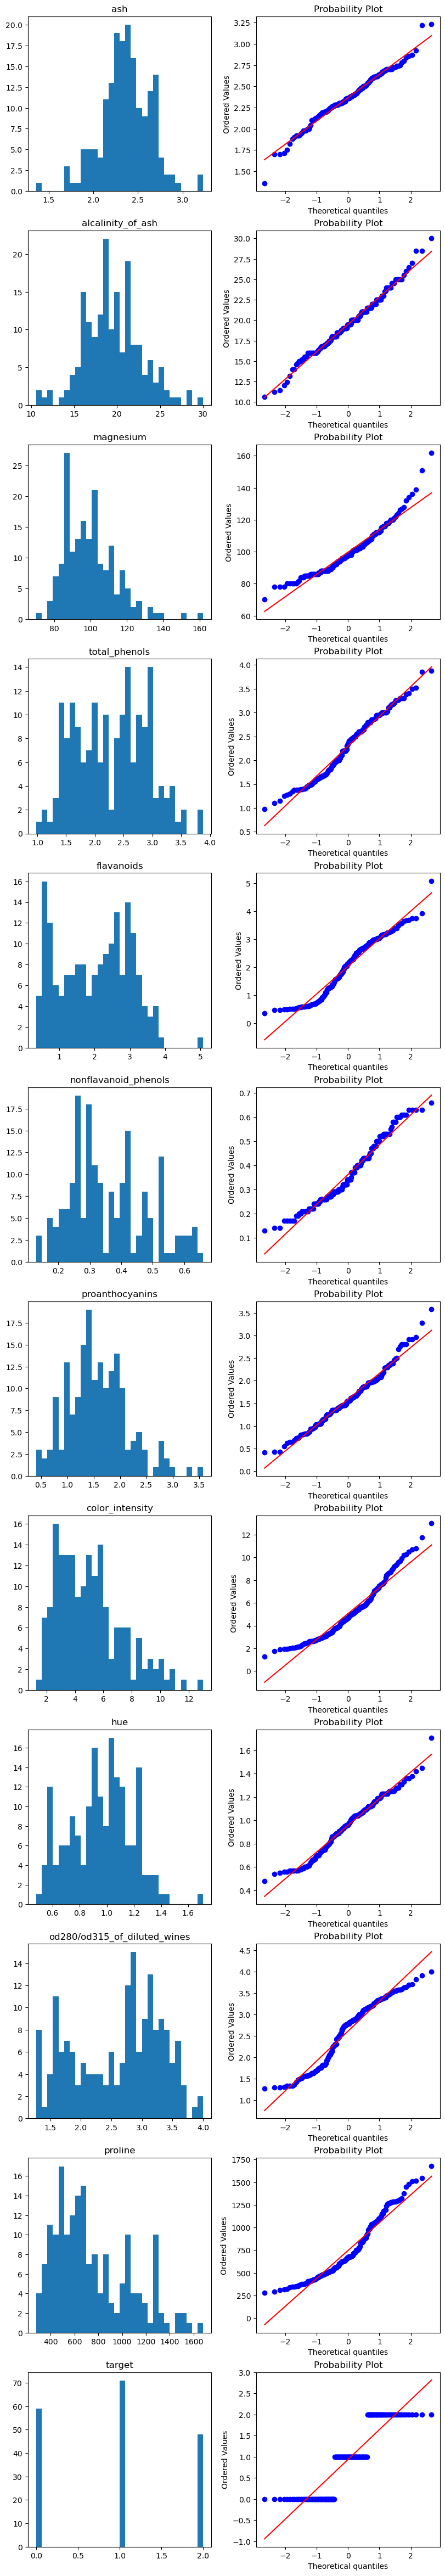

In [14]:
from scipy import stats
from matplotlib import gridspec

plt.tight_layout()
_, n = X.shape
print(headers, X.shape)
fig = plt.figure(constrained_layout=True, figsize=(8, 50))
spec = gridspec.GridSpec(ncols=2, nrows=(n-1), figure=fig)
for i in np.arange(2,n):
    x = toy[headers[i]]
    r = i-1
    qq = fig.add_subplot(spec[r, 1]) 
    stats.probplot(x, plot=qq)
    h = fig.add_subplot(spec[r, 0])
    h.set_title(headers[i])
    h.hist(x, bins = 30)

*******************
**YOUR ANSWER HERE**
******************

# Part 3 Cluster Analysis
In this section, you will perform cluster analysis of the dataset in Part 2 and modify clustering algorithms to achieve better results. 

## Task 3.1

### Task 3.1.1 (6 points)
A)  <span style='color: green'>**\[Implement\]**</span> and plot the **silhouette coefficient** to detect the number of clusters $k$. 

<font color='red'>You can use the KMeans implementation from scikit-learn.</font> <br>

In [15]:
toy = df
first = "alcohol"
second = "flavanoids"
X = toy[[first, second]].to_numpy()
y = toy['target']

In [16]:
# Data
X = toy[[first, second]].to_numpy()
### YOUR CODE HERE


B) <span style='color: green'>**\[Motivate\]**</span> your choice of clusters $k$.

*******************
**YOUR ANSWER HERE**
******************

C) <span style='color: green'>**\[Implement\]**</span><br>
Run k-means on the dataset X, with the number of clusters detected in the previous exercise.

<font color='red'>You can use the KMeans implementation from scikit-learn.</font> <br>

In [17]:
# Data
X = toy[[first, second]].to_numpy()
### YOUR CODE HERE

<span style='color: green'>**\[Motivate\]**</span> Did you find better clusters? Are they more separated? Why is it a good/bad idea to use the Silhouette coefficient? 

*******************
**YOUR ANSWER HERE**
******************

### Task 3.1.2 (3 points)
<span style='color: green'>**\[Implement\]**</span> Kernel K-means and the Gaussian Kernel. 

The Gaussian kernel is defined as in the following equation:

$$
K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\exp \left(-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{2 \sigma^{2}}\right)$$ 

In [18]:
X = df[['malic_acid', "magnesium"]].to_numpy()
X_norm = (X - X.min(0)) / X.ptp(0)
X_scaled = StandardScaler().fit(X_norm).transform(X_norm)

y = df[['target']].to_numpy()

def gaussian_kernel(x,y, sigma=0.2): 
    k = 0 
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return k


def kernel_kmeans(X, n_clusters, kernel=gaussian_kernel, iters=100, error=0):
    # For simplicity use 'init' as initial points for your algorithm
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++",max_iter=1).fit(X)
    init = kmeans.cluster_centers_

    ### YOUR CODE HERE

        
    ### YOUR CODE HERE
    return clusters

# clusters = kernel_kmeans(X_scaled, 3)
# plt.scatter(X[:, 0], X[:, 1], alpha=0.8, c=clusters)

### Task 3.1.3 (3 points)
<span style='color: green'>**\[Motivate\]**</span> Run both kmeans and kernel K-means on the data. 
Which clustering do you think is better and explain why do you think so? Which one most resemble the ground truth labeling? Under which condition is Kernel K-means with Gaussian Kernel better than K-means?

In [19]:
kmeans_clustering = KMeans(n_clusters=3).fit(X_scaled).labels_
gaussian_clustering = kernel_kmeans(X_scaled, 3, kernel=gaussian_kernel)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.8, c=kmeans_clustering)
axes[0].set_title("K-means")

axes[1].scatter(X[:, 0], X[:, 1], alpha=0.8, c=gaussian_clustering)
axes[1].set_title("Gaussian K-means")

axes[2].scatter(X[:, 0], X[:, 1], alpha=0.8, c=y)
axes[2].set_title("Ground Truth")

NameError: name 'clusters' is not defined

*******************
**YOUR ANSWER HERE**
******************

### Task 3.1.4 (4 points)
<span style='color: green'>**\[Motivate\]**</span> Running the code below, draw two example datasets such that:<br>
a). K-means produces clustering better than the one obtained by Gaussian K-means.<br>
b). Gaussian K-means produces clustering better than the one obtained by Vanilla K-means.

Explain why do you think one clustering is better than the other and give the reason why K-means and Gaussian K-means behave this way.

In [ ]:
### You can use this tool to generate the data
from drawdata import ScatterWidget
widget = ScatterWidget()
widget

In [ ]:
### Run this code to print data from the tool above
if len(widget.data) != 0:
    data = widget.data_as_pandas[['x', 'y']][:400].to_numpy()
    print(np.array2string(data, precision=0, separator=',', ).replace('\n', ''))


In [ ]:
### You can use this code for plotting. It's just a template you can modify it if you want to.

# Save your example dataset in the array below
X = np.array([])

# Use the line below for debugging, so that you don't have to copy paste data every time
# X = widget.data_as_pandas[['x', 'y']].to_numpy()[:400]

X_norm = (X - X.min(0)) / X.ptp(0)
X_scaled = StandardScaler().fit(X_norm).transform(X_norm)

n_clusters = 2
kmeans_clustering = KMeans(n_clusters=n_clusters, random_state=2137).fit(X_scaled).labels_
gaussian_clustering = kernel_kmeans(X_scaled, n_clusters, kernel=gaussian_kernel)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.8, c=kmeans_clustering)
axes[0].set_title(f"K-means")

axes[1].scatter(X[:, 0], X[:, 1], alpha=0.8, c=gaussian_clustering)
axes[1].set_title(f"Gaussian K-means")

*******************
**YOUR ANSWER HERE**
******************


## Task 3.2 Clustering quality

### Task 3.2.1 (2 points)
<span style='color: green'>**\[Implement\]**</span> **Normalized Mutual Information (NNI)** as a measure for clustering quality.


**Hint**: First implement **Entropy** and then **Normalized Mutual Information**.

In [ ]:
### C is the clustering obtained by an algorithm and T is the ground truth cluster assignments.

def entropy(C):
    ### IMPLEMENT
    return None


def NMI(C, T):
    ### IMPLEMENT
    return None

Run the code below to measure the quality of clustering obtained by k-means in task 3.1.3.

In [ ]:
X = df[['malic_acid', "magnesium"]].to_numpy()
X_norm = (X - X.min(0)) / X.ptp(0)
y = df[['target']].to_numpy()


T = y # Ground-truth clusters
C = KMeans(n_clusters=3).fit_predict(X_norm)# Clusters obtained by k-means


print(f'Normalized Mutual Information: {NMI(C, T)}')

### Task 3.2.2 (4 points)

<span style='color: green'>**\[Motivate\]**</span><br>
A) Reason about the measure, is the measure influenced by the size of the clusters?  

******************* 
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
B) What does the measure capture? 

*******************
**YOUR ANSWER HERE**
******************

### Task 3.2.3 (4 points)
A) <span style='color: green'>**\[Implement\]**</span> functions computing **Purity** and **F-measure** of a clustering and a ground truth labeling.

In [ ]:
### C is the clustering obtained by an algorithm and T is the ground truth cluster assignments.


def purity(C, T):
    ### IMPLEMENT
    return None


def f_measure(C, T):
    ### IMPLEMENT
    return None


Run the code below to measure the quality of clustering obtained by k-means in task 3.1.3.

In [ ]:
X = df[['malic_acid', "magnesium"]].to_numpy()
X_norm = (X - X.min(0)) / X.ptp(0)
y = df[['target']].to_numpy()


T = y # Ground-truth clusters
C = KMeans(n_clusters=3).fit_predict(X_norm)# Clusters obtained by k-means


print(f'Purity: {purity(C, T)}')
print(f'F-measure: {f_measure(C, T)}')

<span style='color: green'>**\[Motivate\]**</span><br>
B) Reason about the differences in the measures, is one more affected by some the characteristics of the clusters (e.g. size, density, radius)? If so, why? What are the drawbacks and advantages of each measure? 

*******************
**YOUR ANSWER HERE**
******************

### Task 3.2.4 (2 points)

<span style='color: green'>**\[Motivate\]**</span><br>

(1) Check the correct box (or boxes) below and (2) motivate your answers.

- [ ] Conditional Entropy is preferable over Entropy because it uses all the points.
- [ ] F-measure is preferable over Purity because it is less computational demanding.
- [ ] Contingency table is always a square matrix.
- [ ] As number of clusters increases Purity tends to 1.

*******************
**YOUR ANSWER HERE**
******************

## Task 3.3 Gaussian Mixtures and the EM-Algorithm
### Task 3.3.1 (4 point)
<span style='color: green'>**\[Implement\]**</span> the EM-algorithm for the Gaussian Mixture Model.
<br> You can consult [DMA] Section 13.3.2, for a description of how the algorithm works in this particular setup.

In [ ]:
from utilities.gmm import GMM
class MyGMM(GMM):
    def initialize_parameters(self, X):
        """
            This function should utilize information from the data to initialize
            the parameters of the model.
            In particular, it should compute initial values for mu, Sigma, and pi.
            
            The function corresponds to line 2-4 in Algorithm 13.3 in [DMA, p. 349]
            Note, that K can be retrieved as `self.K`.

            Args:
                X (matrix, [n, d]): Data to be used for initialization.

            Returns:
                Tuple (mu, Sigma, pi), 
                    mu has size        [K, d]
                    Sigma has size     [K, d, d]
                    pi has size        [K]
        """
        # TODO: what should the values be for initializing mu, Sigma and pi
        return mu, Sigma, pi


    def posterior(self, X):
        """
            The E-step of the EM algorithm. 
            Returns the posterior probability p(Y|X)

            This function corresponds to line 8 in Algorithm 13.3 in [DMA, p. 349]
            Note, that mean and covariance matrices can be accessed by `self.mu` and `self.Sigma`, respectively.
            
            Args:
                X (matrix, [n,  d]): Data to compute posterior for.

            Returns:
                Matrix of size        [n, K]
        """
        # TODO: what is the posterior probability?
        
        return posterior
        

    def m_step(self, X, P):
        """
            Update the estimates of mu, Sigma, and pi, given the data `X` and the current
            posterior probabilities `P`.

            This function corresponds to line 10-12 in Algorithm 13.3 and Eqn. (13.11-13) in [DMA, p. 349].
            
            Args:
                X (matrix, [n, d]): Data matrix
                P (matrix, [n, K]): The posterior probabilities for the n samples.

            Returns:
                Tuple (mu, Sigma, pi), 
                    mu has size        [K, d]
                    Sigma has size    [K, d, d]
                    pi has size        [K]
        """
        # TODO: what is the values of mu, Sigma, and pi that maximizes the expectation given the posterior?
        return  mu_hat, Si_hat, pi_hat



### Task 3.3.2 (4 points)

Run both k-means and your EM-algorithm for GaussianMixtures<br> 

In [ ]:
X = df[['malic_acid', "magnesium"]].to_numpy()
X_norm = (X - X.min(0)) / X.ptp(0)

n_clusters = 3
kmeans_clustering = KMeans(n_clusters=n_clusters).fit_predict(X_norm)

model = MyGMM(K=n_clusters)
model.fit(X_norm)
gmm_clustering = model.predict(X_norm)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.8, c=kmeans_clustering)
axes[0].set_title(f"K-means")

axes[1].scatter(X[:, 0], X[:, 1], alpha=0.8, c=gmm_clustering)
axes[1].set_title(f"EM Gaussian Mixtures")

<span style='color: green'>**\[Motivate\]**</span><br>
A) Can you see the substantial difference between those two clusterings? Explain it.

(*if you don't see any difference try running the algorithm again*)

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
B) What are the advantages and disadvantages of this approach?<br> 

*******************
**YOUR ANSWER HERE**
******************

# Part 4 Outlier detection
In this exercise we will work with outlier detection techniques and analyze their performance on the small dataset. Before starting the exercise, run the code below. 


In [ ]:
X = df[['malic_acid', "magnesium"]].to_numpy()
X_norm = (X - X.min(0)) / X.ptp(0)

## Task 4.1 (DBoutliers)
We will now compare two outlier detection techniques.
### Task 4.1.1 (2 points)
<span style='color: green'>**\[Implement\]**</span> a simple distance-based outlier detector. This is the distance-based outlier detection from the lectures, where a point is considered an outlier if at most a fraction $pi$ of the other points have a distance less of than $eps$ to it.

In [ ]:
def DBOutliers(X, eps, pi): 
    outliers = None
    ### YOUR CODE STARTS HERE
    
    
    ### YOUR ENDS CODE HERE
    return outliers

### Task 4.1.2 (4 points)
A) <span style='color: green'>**\[Implement\]**</span>
DBOutliers requires tuning the parameters eps, pi. Run the code from Task 4.1.1 with different choices of eps, pi 

**Note** that the data is normalized. Choose two ranges with **at least** 4 values each.  

In [ ]:
### YOUR CODE HERE

### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span><br>

**Present** the results  and **discuss** how the results vary with respect to (1) eps and (2) pi.

*******************
**YOUR ANSWER HERE**
******************

## Task 4.2 Isolation Forest (8 points)

In this section you will recreate implementation of the Isolation Forest from the original paper: https://ieeexplore.ieee.org/abstract/document/4781136.

<span style='color: red'>**Note**: To access the PDF, you must be connected to the university's Wi-Fi or VPN.</span><br>


A) <span style='color: green'>**\[Implement\]**</span> Fill missing parts in the code below.


In [ ]:
def c(n):
    """
    Defined by the equation (1) in the paper.\\
    Computes the expected path length for a given tree size based on the average depth of
    a randomly generated binary search tree.
    
    Parameters:
    -----------
    n (int): The number of data points in the node.
    
    Returns:
    -----------
    float: The expected path length.
    """
    if n <= 1:
        return 0
    ### YOUR CODE STARTS HERE
    

    ### YOUR CODE ENDS HERE
    


class IsolationTree:
    def __init__(self):
        self.left = None
        self.right = None
        self.split_feature = None
        self.split_value = None
        self.size = 0


    def fit(self, X, e, l):
        """
        Defined by the Algorithm 2 in the paper.\\
        Trains the tree on data X.\\
        It's already implemented for you. Do not modify it.

        Parameters:
        -----------
        X: array-like, shape (n_samples, n_features)
        e: current tree height
        l: height limit

        Returns:
        -----------
        IsolationTree: itself
        """
        self.size = len(X)
        
        if e >= l or self.size <= 1:
            return self
        
        # Choose a random feature and split value
        self.split_feature = np.random.randint(X.shape[1])
        min_val, max_val = X[:, self.split_feature].min(), X[:, self.split_feature].max()
        
        if min_val == max_val:
            return self
        
        self.split_value = np.random.uniform(min_val, max_val)
        
        left_mask = X[:, self.split_feature] < self.split_value
        X_left, X_right = X[left_mask], X[~left_mask]
        
        self.left = IsolationTree().fit(X_left, e + 1, l)
        self.right = IsolationTree().fit(X_right, e + 1, l)
        
        return self
    

    def is_external_node(self):
        """
        Checks whether the tree is an external node.\\
        For the definition of external node ctr+F 'external-node' in the paper.

        Returns:
        -----------
        Boolean: True is the tree is an external node, otherwise, False.
        """
        ### YOUR CODE STARTS HERE
    

        ### YOUR CODE ENDS HERE
        
    

    def path_length(self, x, e=0):
        """
        Defined by the Algorithm 3 in the paper.

        Parameters:
        -----------
        x: array-like, shape (n_features,)
        e: current tree height

        Returns:
        -----------
        int: path length of x
        """
        ### YOUR CODE STARTS HERE


        ### YOUR CODE ENDS HERE


class IsolationForest:
    def __init__(self, n_trees, subsample_size):
        self.n_trees = n_trees
        self.subsample_size = subsample_size
        self.height_limit = np.ceil(np.log2(self.subsample_size))
        self.trees = []


    def fit(self, X):
        """
        Trains the forest on data X.

        Parameters:
        -----------
        X: array-like, shape (n_samples, n_features)
        """
        self.trees = []
        for _ in range(self.n_trees):
            sample = X[np.random.choice(X.shape[0], self.subsample_size, replace=False)]
            tree = IsolationTree().fit(sample, 0, self.height_limit)
            self.trees.append(tree)


    def anomaly_score(self, x):
        """
        Defined by equation (2) in the paper.\\
        Computes the anomaly score of instance x.
        
        Note:
        -----------
        Keep in mind that variable 'n' in the equation in the paper does not represent the size of X but rather the size of a tree i.e. sub-sampling size.
        
        Parameters:
        -----------
        x: array-like, shape (n_features,)

        Returns:
        -----------
        float: the anomaly score of instance x
        """
        ### YOUR CODE STARTS HERE


        ### YOUR CODE ENDS HERE


    def identify_outliers(self, X, threshold=0.5):
        """
        Identifies outliers in the X based on an anomaly score.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
        threshold: the cutoff value for determining whether a sample is an outlier.

        Returns:
        -----------
        outliers : array-like, shape (n_samples,)\\
        A boolean array where each element corresponds to a sample in X.\\
        True indicates that the anomaly score of the sample is greater than the threshold.
        """
        ### YOUR CODE STARTS HERE


        ### YOUR CODE ENDS HERE


B). <span style='color: green'>**\[Implement\]**</span> Create an Isolation Forest with $n\_trees = 100$, $subsample\_size = 50$ and train it on $X$. Then, use the Isolation Forest to find outliers in $X$ and plot the result. You might need to fine-tune parameter $threshold$ so that the result is meaningful.

In [ ]:
X = df[['malic_acid', "magnesium"]].to_numpy()
X_norm = (X - X.min(0)) / X.ptp(0)

### YOUR CODE STARTS HERE


### YOUR CODE ENDS HERE

C) <span style='color: green'>**\[Motivate\]**</span> Present the results and discuss what you found and what is the impact of $threshold$.

*******************
**YOUR ANSWER HERE**
******************